In [1]:
#Importing the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#supress scientific notation of values
pd.options.display.float_format = '{:.2f}'.format
#increasing max number of columns and rows  displayed with pandas.
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 60)

In [4]:
#Loading data set file in to data frame.
#using low memory flag to load columns with multiple data types.
data = pd.read_csv("G:\loan.csv", low_memory=False)
data.head(7)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000          4975.00   36 months   
1  1077430    1314167       2500         2500          2500.00   60 months   
2  1077175    1313524       2400         2400          2400.00   36 months   
3  1076863    1277178      10000        10000         10000.00   36 months   
4  1075358    1311748       3000         3000          3000.00   60 months   
5  1075269    1311441       5000         5000          5000.00   36 months   
6  1069639    1304742       7000         7000          7000.00   60 months   

  int_rate  installment grade sub_grade                  emp_title emp_length  \
0   10.65%       162.87     B        B2                        NaN  10+ years   
1   15.27%        59.83     C        C4                      Ryder   < 1 year   
2   15.96%        84.33     C        C5                        NaN  10+ years   
3   13.49%       339.31     C        C1        AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5   University Medical Group     1 year   
5    7.90%       156.46     A        A4       Veolia Transportaton    3 years   
6   15.96%       170.08     C        C5  Southern Star Photography    8 years   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT    24000.00            Verified  Dec-11   Fully Paid   
1           RENT    30000.00     Source Verified  Dec-11  Charged Off   
2           RENT    12252.00        Not Verified  Dec-11   Fully Paid   
3           RENT    49200.00     Source Verified  Dec-11   Fully Paid   
4           RENT    80000.00     Source Verified  Dec-11      Current   
5           RENT    36000.00     Source Verified  Dec-11   Fully Paid   
6           RENT    47004.00        Not Verified  Dec-11   Fully Paid   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   
5          n  https://lendingclub.com/browse/loanDetail.acti...   
6          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc             purpose  \
0    Borrower added on 12/22/11 > I need to upgra...         credit_card   
1    Borrower added on 12/22/11 > I plan to use t...                 car   
2                                                NaN      small_business   
3    Borrower added on 12/21/11 > to pay for prop...               other   
4    Borrower added on 12/21/11 > I plan on combi...               other   
5                                                NaN             wedding   
6    Borrower added on 12/18/11 > I am planning o...  debt_consolidation   

                                   title zip_code addr_state   dti  \
0                               Computer    860xx         AZ 27.65   
1                                   bike    309xx         GA  1.00   
2                   real estate business    606xx         IL  8.72   
3                               personel    917xx         CA 20.00   
4                               Personal    972xx         OR 17.94   
5  My wedding loan I promise to pay back    852xx         AZ 11.20   
6                                   Loan    280xx         NC 23.51   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0            0           Jan-85               1                     NaN   
1            0           Apr-99               5                     NaN   
2            0           Nov-01               2                     NaN   
3            0           Feb-96               1                   35.00   
4            0           Jan-96               0                   3

In [5]:
#shape of data frame
data.shape

(39717, 111)

In [6]:
#Lower rows of data frame
data.tail(8)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
39709  92533      92529       5000         5000           675.00   36 months   
39710  92507      92502       5000         5000           250.00   36 months   
39711  92402      92390       5000         5000           700.00   36 months   
39712  92187      92174       2500         2500          1075.00   36 months   
39713  90665      90607       8500         8500           875.00   36 months   
39714  90395      90390       5000         5000          1325.00   36 months   
39715  90376      89243       5000         5000           650.00   36 months   
39716  87023      86999       7500         7500           800.00   36 months   

      int_rate  installment grade sub_grade                   emp_title  \
39709   11.22%       164.23     C        C4              Self-Employeed   
39710    7.43%       155.38     A        A2           Rush Univ Med Grp   
39711    8.70%       158.30     B        B1         A. F. Wolfers, Inc.   
39712    8.07%        78.42     A        A4             FiSite Research   
39713   10.28%       275.38     C        C1  Squarewave Solutions, Ltd.   
39714    8.07%       156.84     A        A4                         NaN   
39715    7.43%       155.38     A        A2                         NaN   
39716   13.75%       255.43     E        E2            Evergreen Center   

      emp_length home_ownership  annual_inc verification_status issue_d  \
39709   < 1 year            OWN    80000.00        Not Verified  Jul-07   
39710     1 year            OWN    85000.00        Not Verified  Jul-07   
39711    5 years       MORTGAGE    75000.00        Not Verified  Jul-07   
39712    4 years       MORTGAGE   110000.00        Not Verified  Jul-07   
39713    3 years           RENT    18000.00        Not Verified  Jul-07   
39714   < 1 year       MORTGAGE   100000.00        Not Verified  Jul-07   
39715   < 1 year       MORTGAGE   200000.00        Not Verified  Jul-07   
39716   < 1 year            OWN    22000.00        Not Verified  Jun-07   

      loan_status pymnt_plan  \
39709  Fully Paid          n   
39710  Fully Paid          n   
39711  Fully Paid          n   
39712  Fully Paid          n   
39713  Fully Paid          n   
39714  Fully Paid          n   
39715  Fully Paid          n   
39716  Fully Paid          n   

                                                     url  \
39709  https://lendingclub.com/browse/loanDetail.acti...   
39710  https://lendingclub.com/browse/loanDetail.acti...   
39711  https://lendingclub.com/browse/loanDetail.acti...   
39712  https://lendingclub.com/browse/loanDetail.acti...   
39713  https://lendingclub.com/browse/loanDetail.acti...   
39714  https://lendingclub.com/browse/loanDetail.acti...   
39715  https://lendingclub.com/browse/loanDetail.acti...   
39716  https://lendingclub.com/browse/loanDetail.acti...   

                                                    desc             purpose  \
39709                                                NaN         credit_card   
39710                                                NaN         credit_card   
39711  I'd like to shift some credit card debt so it ...         credit_card   
39712  Our current gutter system on our home is old a...    home_improvement   
39713  The rate of interest and fees incurred by carr...         credit_card   
39714                                                NaN  debt_consolidation   
39715                                                NaN               other   
39716  I plan to consolidate over $7,000 of debt: a c...  debt_consolidation   

                           title zip_code addr_state   dti  delinq_2yrs  \
39709     P's Family Credit Loan    537xx         WI  1.21            0   
39710        My Credit Card Loan    537xx         WI  0.31            0   
39711    Reduce Credit Card Debt    804xx         CO 15.55            0   
39712           Home Improvement    802xx         CO 11.33            0   
39713  Reti

In [7]:
#Finding percentage of null or missing values
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
#Printing columns which have more than 0% missing values
null_perc[ null_perc > 0 ]

emp_title                      6.19
emp_length                     2.71
desc                          32.58
title                          0.03
mths_since_last_delinq        64.66
                              ...  
tax_liens                      0.10
tot_hi_cred_lim              100.00
total_bal_ex_mort            100.00
total_bc_limit               100.00
total_il_high_credit_limit   100.00
Length: 68, dtype: float64

In [8]:
#Removing columns which has more than 30% null values in it.
data.drop(null_perc[ null_perc > 30 ].index, axis=1, inplace=True)

In [9]:
#Finding number of unique values in each vcolumn
data.nunique().sort_values().head(15)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
initial_list_status           1
pymnt_plan                    1
term                          2
pub_rec_bankruptcies          3
verification_status           3
loan_status                   3
pub_rec                       5
home_ownership                5
dtype: int64

**'tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'** columns have only one unique value in all the rows, which will not give any usefull info for us. so, lets remove them.

In [14]:
#Dropping Columns with only one values.
data.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)

In [15]:
#Finding number of unique values, printing high unique valued columns
data.nunique().sort_values(ascending=False).head(12)

id                 39717
url                39717
member_id          39717
total_pymnt        37850
total_pymnt_inv    37518
total_rec_int      35148
last_pymnt_amnt    34930
emp_title          28820
revol_bal          21711
title              19615
installment        15383
funded_amnt_inv     8205
dtype: int64

**emp_title, and title** columns have text values which are more unique values.

In [17]:
data.drop(['emp_title', 'title'], axis=1, inplace=True)

**id, url, and member_id** having all unique values which means any one of these can be used as primary key. Let's use id primary key and remove url and member id columns.

In [18]:
data.drop(['member_id', 'url'], axis=1, inplace=True)

**total_rec_int, total_rec_prncp, total_rec_late_fee, recoveries, collection_recovery_fee, last_credit_pull_d, last_pymnt_d, out_prncp, out_prncp_inv** variables are valid for barrowers who already took loan. As we are only interested only in loan application details these columns can be removed. **recoveries, collection_recovery_fee** columns are only valid for charged off loans. Will removed these colomns.

In [19]:
data.drop(['total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d'], axis=1, inplace=True)
data.drop(['out_prncp', 'out_prncp_inv'], axis=1, inplace=True)

In [20]:
#Check percentage of null or missing values
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
null_perc[ null_perc > 0 ]

emp_length             2.71
revol_util             0.13
pub_rec_bankruptcies   1.75
dtype: float64

Removing the the null valued rows in the above columns.

In [21]:
data.dropna(subset=['emp_length', 'revol_util', 'pub_rec_bankruptcies'], inplace=True)
#Check percentage of null or missing values
null_perc = round(100*(data.isnull().sum()/len(data.index)), 2)
null_perc[ null_perc > 0 ]

Series([], dtype: float64)

**Loan Data Status** we will remove the row with current values in loan status,because there are three distict value of column,so we need only full paid and charged off.


In [22]:
#Removing current loan status rows
data = data[data.loan_status != 'Current']

In [23]:
#Checking unique values for term column
data.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

lets remove it because there is only empty space at the start of value.

In [24]:
#Stripping empty space in values in term
data['term'] = data.term.str.strip()
data.term.unique()

array(['36 months', '60 months'], dtype=object)

In [25]:
data.shape

(36800, 31)

# Data type conversions

In [26]:
# Finding datatype in all coulmns
data.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
last_pymnt_amnt         float64
pub_rec_bankruptcies    float64
dtype: o

**int_rate and revol_util** are having '%' symbol values and having data type of object. Let's remove % at the end and convert to float

In [27]:
#stripping '%' value
data['int_rate'] = data.int_rate.str.strip('%').astype(float)
data['revol_util'] = data.revol_util.str.strip('%').astype(float)

**issue_d, earliest_cr_line** are having date values, let channge the column data type to date.

In [28]:
#converting to date type
data['issue_d'] = pd.to_datetime(data.issue_d, format='%b-%y')
#if there are any data before unix timestamp they are converted to 21 century values, 
#so subtracting values more than 2020  with 100 will give more actual time
data['issue_d'] = data['issue_d'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

data['earliest_cr_line'] = pd.to_datetime(data.earliest_cr_line, format='%b-%y')
data['earliest_cr_line'] = data['earliest_cr_line'].apply(lambda x: x-pd.DateOffset(years=100) if x.year > 2020 else x)

In [29]:
# Converted to proper datatypes for analysis
data.dtypes

id                               int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line        datetime64[ns]
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util               

# Derived Variables

**Let's create new columns from date type columns**

In [30]:
#issue_d column
data['issue_d_year'] = data.issue_d.dt.year
data['issue_d_month'] = data.issue_d.dt.strftime('%b')
data['issue_d_weekday'] = data.issue_d.dt.weekday
#data type conversion of year and weekday
data['issue_d_year'] = data['issue_d_year'].astype(object)
data['issue_d_weekday'] = data['issue_d_weekday'].astype(object)

#earliest_cr_line
data['earliest_cr_line_year'] = data.earliest_cr_line.dt.year
data['earliest_cr_line_month'] = data.earliest_cr_line.dt.strftime('%b')
#data type conversion of year and weekday
data['earliest_cr_line_year'] = data['earliest_cr_line_year'].astype(object)

Creating Approved Loan amount ratio which is a ratio of Funded Amount by investor to Requested Loan amount.

In [31]:
data['approved_loan_amnt_ratio'] = round(data.funded_amnt_inv*100/data.loan_amnt,2)

In [32]:
data.head(8)

id  loan_amnt  funded_amnt  funded_amnt_inv       term  int_rate  \
0  1077501       5000         5000          4975.00  36 months     10.65   
1  1077430       2500         2500          2500.00  60 months     15.27   
2  1077175       2400         2400          2400.00  36 months     15.96   
3  1076863      10000        10000         10000.00  36 months     13.49   
5  1075269       5000         5000          5000.00  36 months      7.90   
6  1069639       7000         7000          7000.00  60 months     15.96   
7  1072053       3000         3000          3000.00  36 months     18.64   
8  1071795       5600         5600          5600.00  60 months     21.28   

   installment grade sub_grade emp_length home_ownership  annual_inc  \
0       162.87     B        B2  10+ years           RENT    24000.00   
1        59.83     C        C4   < 1 year           RENT    30000.00   
2        84.33     C        C5  10+ years           RENT    12252.00   
3       339.31     C        C1  10+ years           RENT    49200.00   
5       156.46     A        A4    3 years           RENT    36000.00   
6       170.08     C        C5    8 years           RENT    47004.00   
7       109.43     E        E1    9 years           RENT    48000.00   
8       152.39     F        F2    4 years            OWN    40000.00   

  verification_status    issue_d  loan_status             purpose zip_code  \
0            Verified 2011-12-01   Fully Paid         credit_card    860xx   
1     Source Verified 2011-12-01  Charged Off                 car    309xx   
2        Not Verified 2011-12-01   Fully Paid      small_business    606xx   
3     Source Verified 2011-12-01   Fully Paid               other    917xx   
5     Source Verified 2011-12-01   Fully Paid             wedding    852xx   
6        Not Verified 2011-12-01   Fully Paid  debt_consolidation    280xx   
7     Source Verified 2011-12-01   Fully Paid                 car    900xx   
8     Source Verified 2011-12-01  Charged Off      small_business    958xx   

  addr_state   dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  \
0         AZ 27.65            0       1985-01-01               1         3   
1         GA  1.00            0       1999-04-01               5         3   
2         IL  8.72            0       2001-11-01               2         2   
3         CA 20.00            0       1996-02-01               1        10   
5         AZ 11.20            0       2004-11-01               3         9   
6         NC 23.51            0       2005-07-01               1         7   
7         CA  5.35            0       2007-01-01               2         4   
8         CA  5.55            0       2004-04-01               2        11   

   pub_rec  revol_bal  revol_util  total_acc  total_pymnt  total_pymnt_inv  \
0        0      13648       83.70          9      5863.16          5833.84   
1        0       1687        9.40          4      1008.71          1008.71   
2        0       2956       98.50         10      3005.67          3005.67   
3        0       5598       21.00         37     12231.89         12231.89   
5        0       7963       28.30         12      5632.21          5632.21   
6        0      17726       85.60         11     10110.84         10110.84   
7        0       8221       87.50          4      3939.14          3939.14   
8        0       5210       32.60         13       646.02           646.02   

   last_pymnt_amnt  pub_rec_bankruptcies issue_d_year issue_d_month  \
0           171.62                  0.00         2011           Dec   
1           119.66                  0.00         2011           Dec   
2           649.91                  0.00         2011           Dec   
3           357.48                  0.00         2011           Dec   
5           161.03                  0.00         2011           Dec   
6          1313.76                  0.00         2011           Dec   
7           111.34                  0.00         2011           Dec 

In [33]:
# Converted date formats for analysis
data.dtypes

id                                   int64
loan_amnt                            int64
funded_amnt                          int64
funded_amnt_inv                    float64
term                                object
int_rate                           float64
installment                        float64
grade                               object
sub_grade                           object
emp_length                          object
home_ownership                      object
annual_inc                         float64
verification_status                 object
issue_d                     datetime64[ns]
loan_status                         object
purpose                             object
zip_code                            object
addr_state                          object
dti                                float64
delinq_2yrs                          int64
earliest_cr_line            datetime64[ns]
inq_last_6mths                       int64
open_acc                             int64
pub_rec    

# Univariate Analysis

# Loan Amount

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hi\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


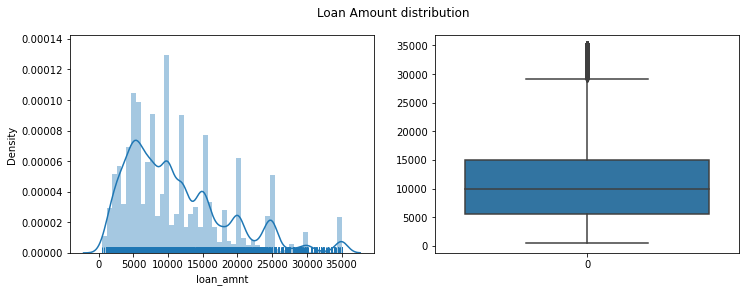

In [34]:
#Increasing the figure size of plot
plt.figure(figsize=(12,4))
#Setting subplot index
plt.subplot(1,2,1)
#Histogram plot
sns.distplot(a=data.loan_amnt, rug=True)
plt.subplot(1,2,2)
#Box plot
sns.boxplot(data=data.loan_amnt)
#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()

In [35]:
#Stats of laon amount
data.loan_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   36800.00
mean    11149.54
std      7369.86
min       500.00
5%       2400.00
10%      3200.00
25%      5500.00
50%     10000.00
75%     15000.00
90%     22000.00
95%     25000.00
99%     35000.00
max     35000.00
Name: loan_amnt, dtype: float64

**Observations:**<br>
From the above plots, more number of people took loan amount of 10000, and also meadian of distribution is 10000. And very few people took more than 30000 loan amount.

## funded_amnt

The total amount committed to that loan at that point in time.

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hi\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


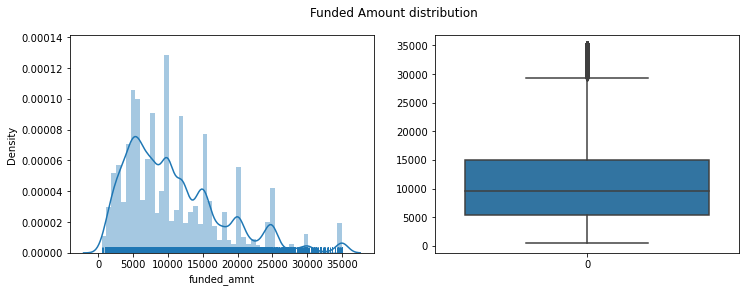

In [36]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=data.funded_amnt, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=data.funded_amnt)
plt.suptitle('Funded Amount distribution')
plt.show()

In [37]:
data.funded_amnt.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   36800.00
mean    10880.79
std      7109.16
min       500.00
5%       2400.00
10%      3200.00
25%      5400.00
50%      9600.00
75%     15000.00
90%     20375.00
95%     25000.00
99%     35000.00
max     35000.00
Name: funded_amnt, dtype: float64

## Observations:
Funded amount data behaves similar to loan Amount, Which tells us that Lending club approved most of Applied loan amount.

## funded_amnt_inv

The total amount committed by investors for that loan at that point in time.

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hi\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


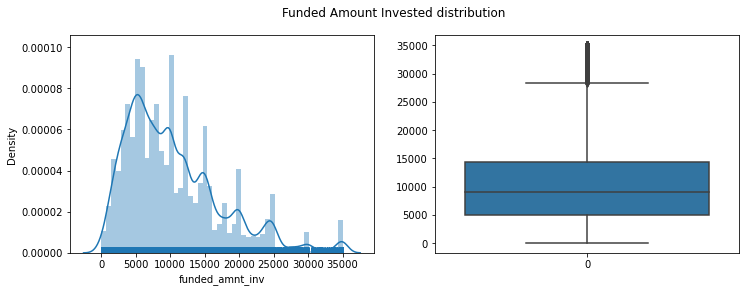

In [38]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=data.funded_amnt_inv, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=data.funded_amnt_inv)
plt.suptitle('Funded Amount Invested distribution')
plt.show()

In [39]:
data.funded_amnt_inv.describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

count   36800.00
mean    10439.06
std      7008.52
min         0.00
5%       2000.00
10%      3000.00
25%      5000.00
50%      9000.00
75%     14350.00
90%     20000.00
95%     24655.82
99%     34725.00
max     35000.00
Name: funded_amnt_inv, dtype: float64

**Observations:**<br>
Funded amount investment data looks like same as to loan Amount, Which tells us that Lending club approved atmost of Applied loan amount.

## Approved Loan Amount Ratio

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


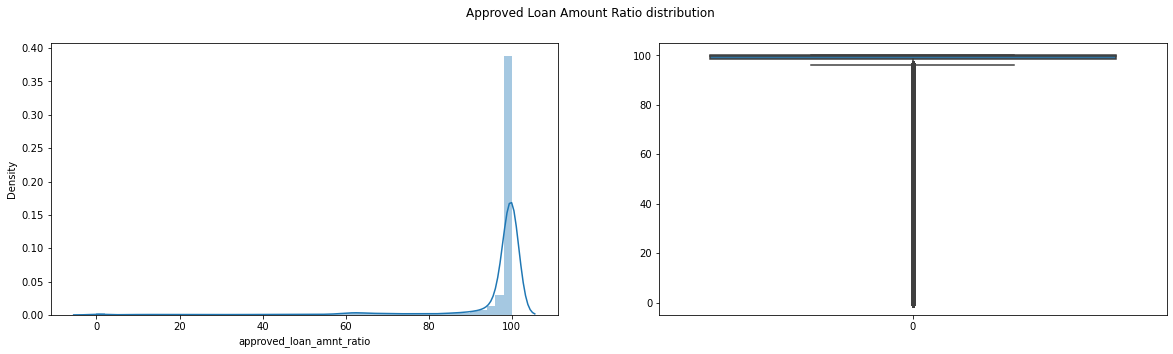

In [40]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(a=data.approved_loan_amnt_ratio)
plt.subplot(1,2,2)
sns.boxplot(data=data.approved_loan_amnt_ratio)
plt.suptitle('Approved Loan Amount Ratio distribution')
plt.show()

**Observations:**<br> 70% of Borrowers got 100% loan amount from investors.

## Interest Rate

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hi\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


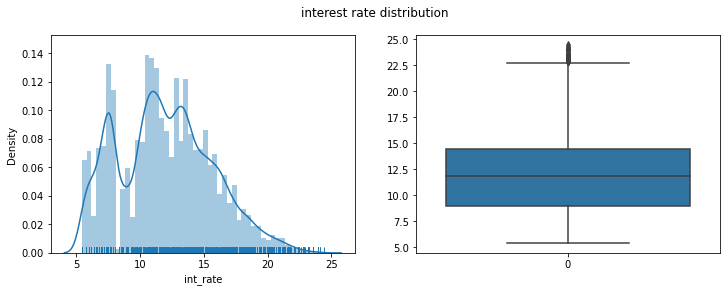

In [41]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=data.int_rate, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=data.int_rate)
plt.suptitle('interest rate distribution')
plt.show()

**Observations:**<br>
From the above 2 plots and statistics of interest rates we can conclude that most of the interest rates lies between **9% to 14.5%.** Some people took loan at higher rates of interest i.e., **22.5%**

## Installment
The monthly payment owed by the borrower if the loan originates.

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hi\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


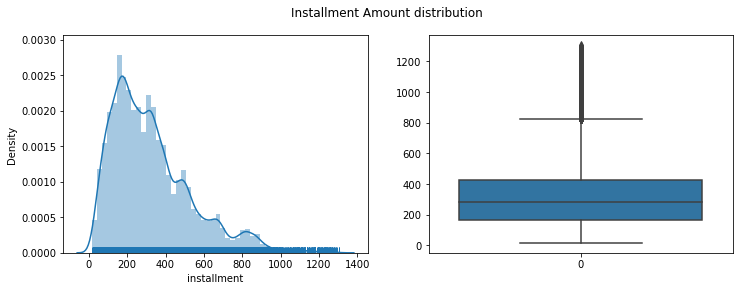

In [42]:
installment = data.installment
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=installment, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=installment)
plt.suptitle('Installment Amount distribution')
plt.show()

**Observations:**<br>
The Most representative value of Installment amount in around 280.

## annual_inc
The self-reported annual income provided by the borrower during registration.

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hi\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


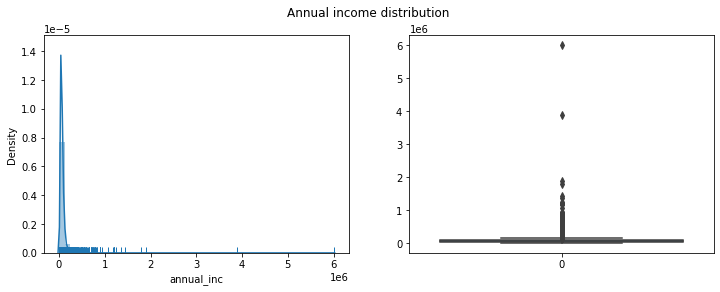

In [43]:
var1 = data.annual_inc
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)
plt.suptitle('Annual income distribution')
plt.show()

**Observations:**<br>
Around 361 people are having more the 235000 annual income. and 99% of people are having incomes below 235000.

## dti
A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Hi\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


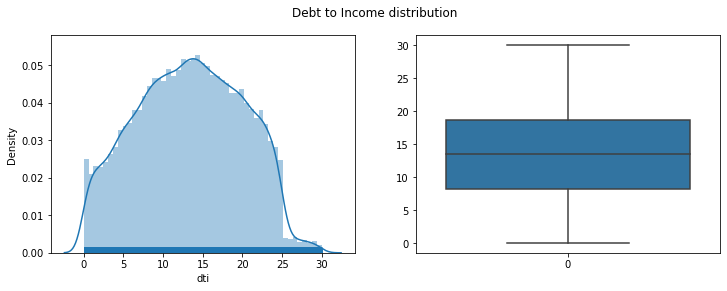

In [44]:
var1 = data.dti

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=var1, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=var1)
plt.suptitle('Debt to Income distribution')
plt.show()

**Observations:**<br>
Looks like there are no outliers and the distribution is very much similar to normal distribution. This is good sign that all the loans are given to barrower's who have Debt to Income ration less than 30.

## Pub rec
Number of Public derogatory records

Text(0.5, 1.0, 'pub_rec Distribution')

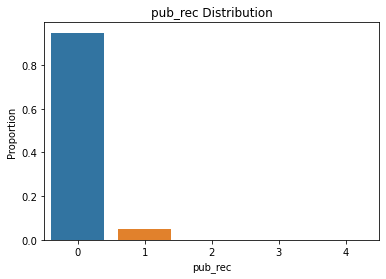

In [46]:
var = 'pub_rec'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

**Observations**<br>
Around 90% borrower's are having no public derogatory records.

## pub_rec_bankruptcies
Number of public record bankruptcies

Text(0.5, 1.0, 'pub_rec_bankruptcies Distribution')

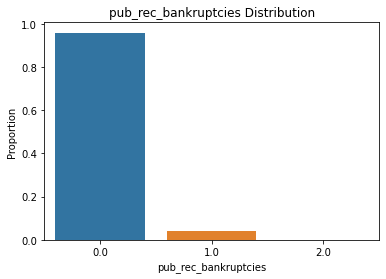

In [47]:
var = 'pub_rec_bankruptcies'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

**Observations:**<br>
99% people have not went bankrupt.

## Loan issue date (issue_d)

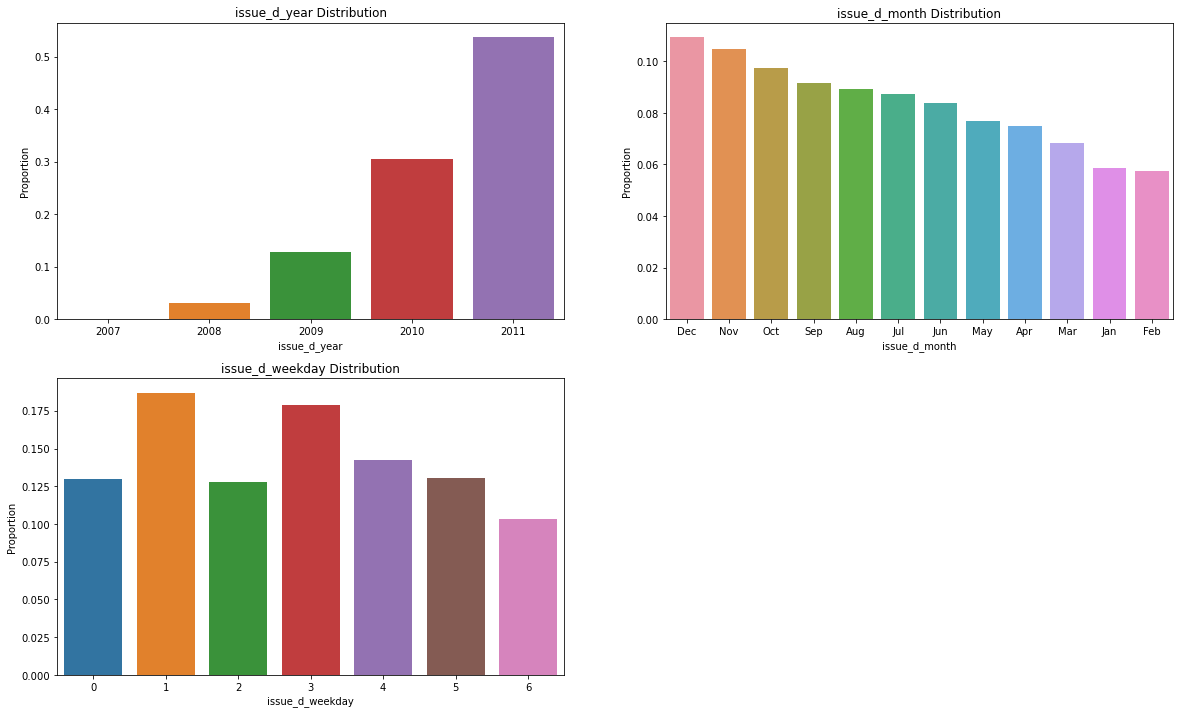

In [48]:
var = 'issue_d_year'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

var = 'issue_d_month'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
plt.subplot(2,2,2)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')


var = 'issue_d_weekday'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
plt.subplot(2,2,3)
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')

plt.show()

**Observations:**<br>
* The lending club(LC) has doubling loan issues every year.<br>
* There are more issues of loan in last 3 months every end of the ear i.e., Oct, Nov and Dec.<br>
* LC has more loans issue on tuesday and wednessday than other week days.<br>

## Erliest Credit line (earliest_cr_line)

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


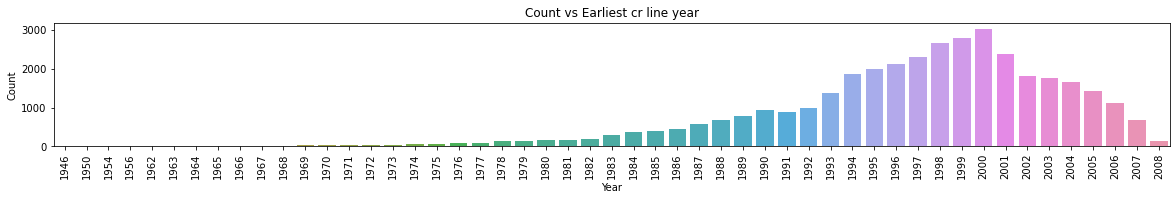

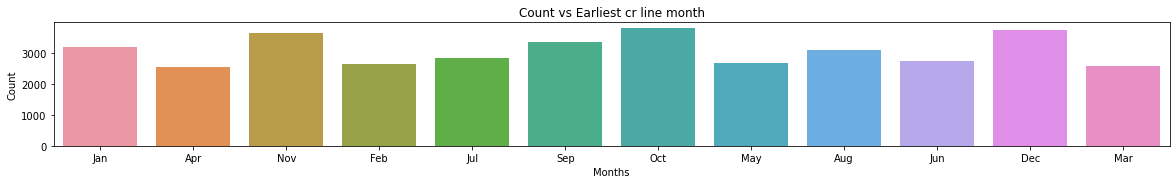

In [49]:
plt.figure(figsize=(20,5))
plt.subplot(2,1,1)
sns.countplot(data.earliest_cr_line_year)
plt.title('Count vs Earliest cr line year')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.figure(figsize=(20,5))
plt.subplot(2,1,2)
sns.countplot(data.earliest_cr_line_month)
plt.title('Count vs Earliest cr line month')
plt.xlabel('Months')
plt.ylabel('Count')
plt.show()

**Observations:**<br> Many of Loan borrowers of LC have got earlier credit line in 2000 year, and also most have got earlier credit line on end of the year i.e., Oct, Nov, Dec

## Term

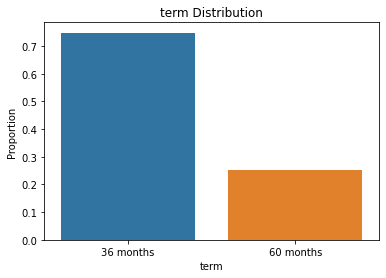

In [50]:
var = 'term'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Observations:**<br>
Barrowrs have taken 36 months tenure more than 60 months.

## Grade

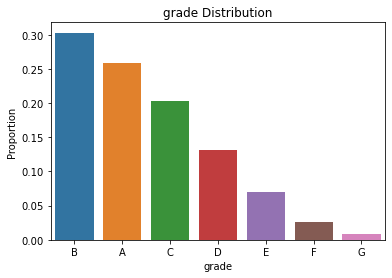

In [51]:
var = 'grade'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Observations:**<br>
Most borrowers fall under A and B grades then other grades

## Sub Grade

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


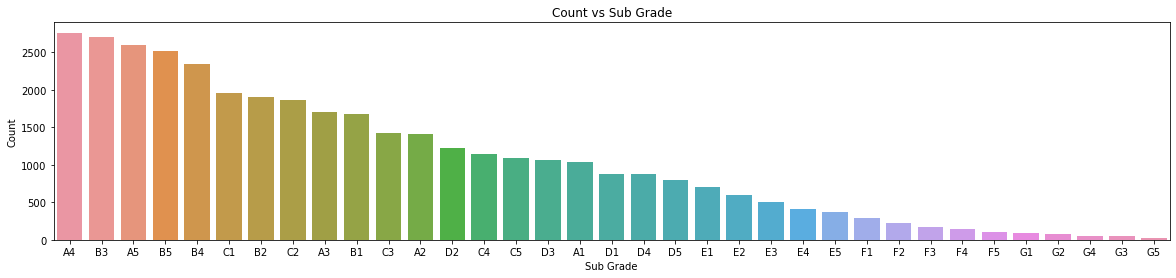

In [52]:
plt.figure(figsize=(20,4))
sns.countplot(data.sub_grade, order=data.sub_grade.value_counts().index)
plt.title('Count vs Sub Grade')
plt.xlabel('Sub Grade')
plt.ylabel('Count')
plt.show()

## Employment length

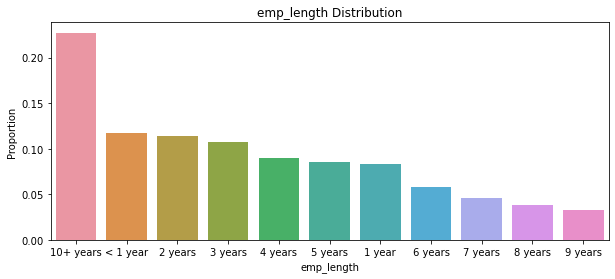

In [53]:
plt.figure(figsize=(10,4))
var = 'emp_length'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Observations:**<br>
Borrowers are mostly 10+ years emploment length.

## Home Ownership

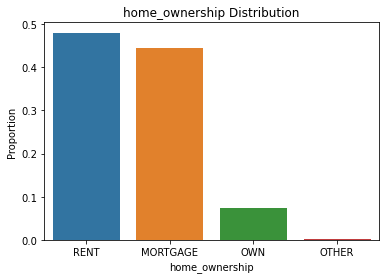

In [54]:
var = 'home_ownership'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()
#Plotting percentage proporation vs home ownership
sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Observations:**<br>
The loan borrowers are mostly having rented and mortgage houses.

## Verification Status

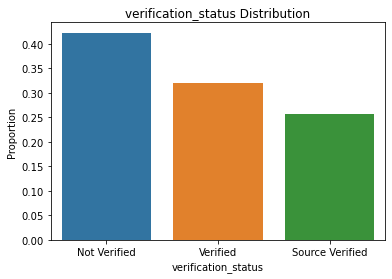

In [55]:
var = 'verification_status'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Observations:**<br>
Majority of loans were given without verification of applicants income.

## Loan Status

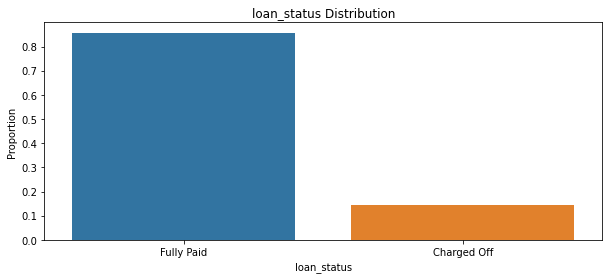

In [56]:
plt.figure(figsize=(10,4))
var = 'loan_status'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Observations:**<br>
85% of borrowers has paid the loan fully at time . where are 14% are defaulted the loan at given time
.

## Purpose

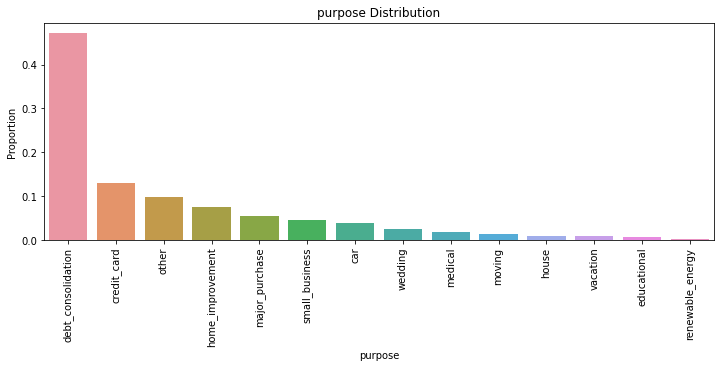

In [57]:
plt.figure(figsize=(12,4))
var = 'purpose'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.xticks(rotation=90)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Observations:**<br>
Looks line more number of people took loan for debt consolidation and a very few people took for renewable energy

## Borrower's State (add_state)

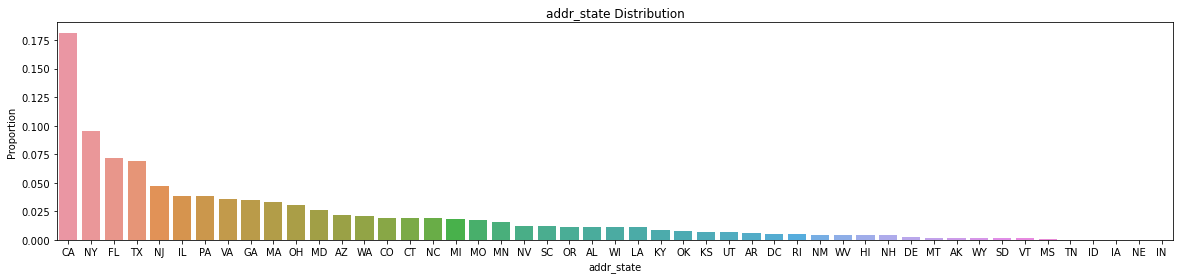

In [59]:
plt.figure(figsize=(20,4))
var = 'addr_state'
#Probability / Percentage of each values
prob_df = data[var].value_counts(normalize=True).reset_index()

sns.barplot(x='index', y=var, data=prob_df)
plt.xlabel(var)
plt.ylabel('Proportion')
plt.title(var+' Distribution')
plt.show()

**Observations:**<br>
Most of the borrowers are from CA and NY

# Segmented Univariate Analysis

## Loan Amount

<AxesSubplot:title={'center':'Grade vs Loan Amount'}, xlabel='grade', ylabel='loan_amnt'>

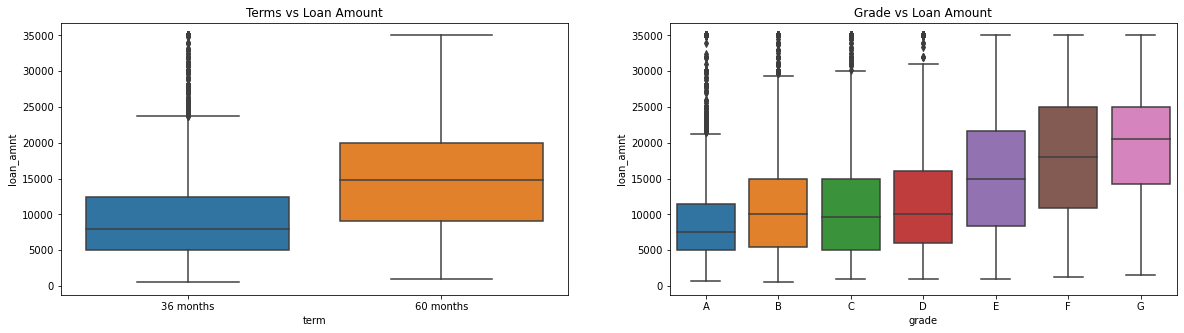

In [60]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.loan_amnt, data=data)
plt.title('Terms vs Loan Amount')
plt.subplot(122)
plt.title('Grade vs Loan Amount')
#Finding grades with sorted alphabetical order
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.loan_amnt, order = grade_ord, data=data)

**Observations:**<br>
Higher amount loans have high tenure i.e, 60 months.
Grade 'G' and 'H' have taken max loan amount. As Grades are decreasing the loan amount is increasing.

<AxesSubplot:title={'center':'verification_status vs Loan Amount'}, xlabel='verification_status', ylabel='loan_amnt'>

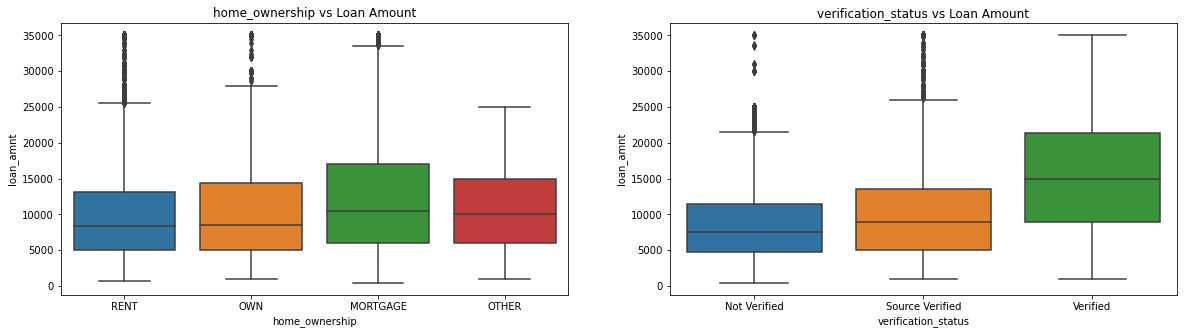

In [62]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.loan_amnt, data=data)
plt.title('home_ownership vs Loan Amount')
plt.subplot(122)
plt.title('verification_status vs Loan Amount')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.loan_amnt, order = verification_status_ord, data=data)

**Observations:**<br>
more borrowers are from MORTAGE and also the median loan amount also high for MORTAGE owned borrowers.
And most of borrowers are verified for borrowing loan >9k

Text(0.5, 1.0, 'loan_status vs Loan Amount')

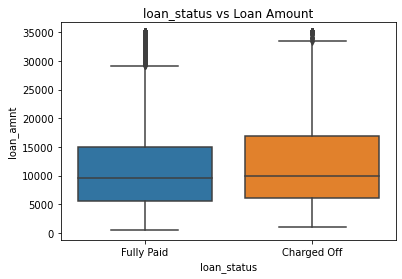

In [63]:
sns.boxplot(x='loan_status', y=data.loan_amnt, data=data)
plt.title('loan_status vs Loan Amount')

**Observations:**<br>
Charged Off loans have higher amounts than Fully Paid ones.

Text(0.5, 1.0, 'purpose vs Loan Amount')

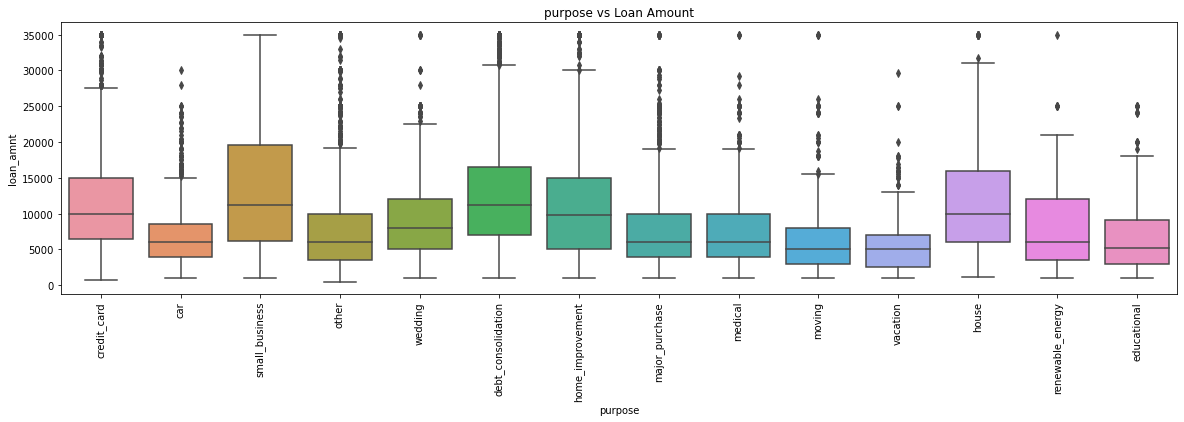

In [64]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.loan_amnt, data=data)
#Rotating x values 90 for better visibility
plt.xticks(rotation=90)
plt.title('purpose vs Loan Amount')

**Observations:**<br>
More loan amount is from Small bussiness followed by debt consolidation.

Text(0.5, 1.0, 'emp_length vs Loan Amount')

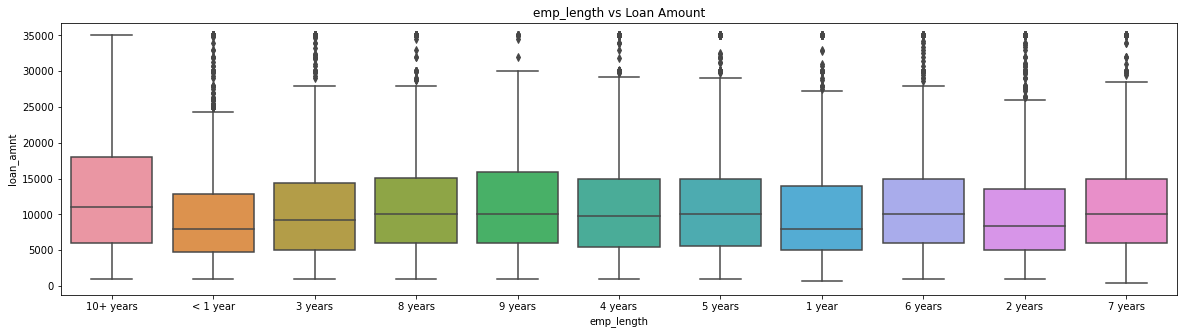

In [65]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.loan_amnt, data=data)
plt.title('emp_length vs Loan Amount')

**Observations:**<br> 
more borrowers are from 10+ years and least is <1 year

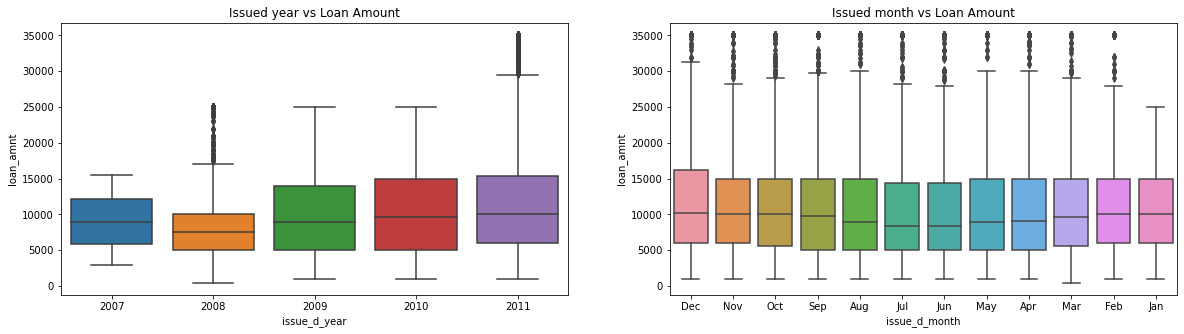

In [66]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=data.issue_d_year, y=data.loan_amnt, data=data)
plt.title('Issued year vs Loan Amount')
plt.subplot(122)
sns.boxplot(x=data.issue_d_month, y=data.loan_amnt, data=data)
plt.title('Issued month vs Loan Amount')
plt.show()

**Observations:**<br>

* The meadian loan amount in each year did not change much but the distribution is more spread as the years increase, which means people have taken different loan amounts in each year.<br>
* Few Loan borrowers took heigher loan amount in 2008 and 2011 which are plotted as ouliers.<br>
* Loan borrowers took almost similar amounts in all the months except in December, people have taken heigher amounts as distribution is high above median.<br>

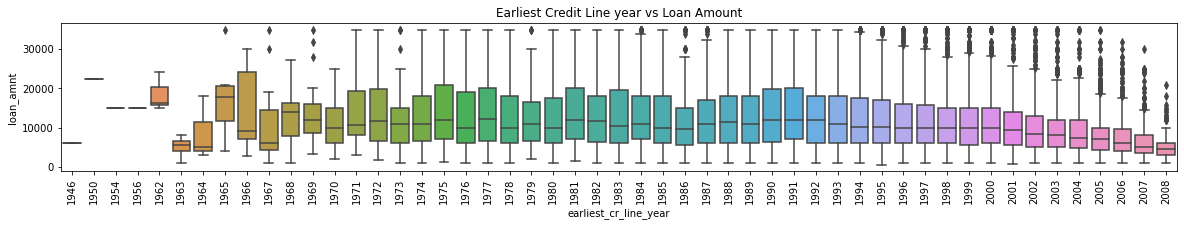

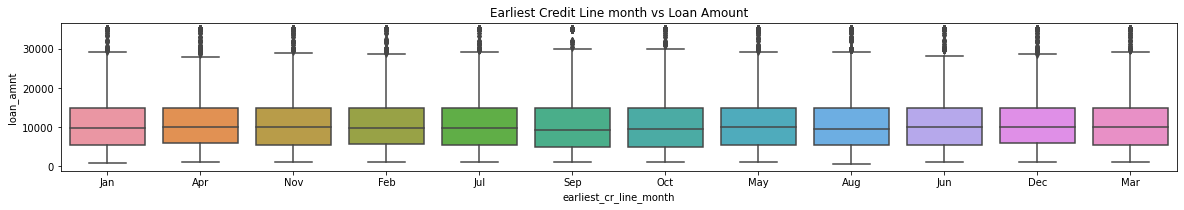

In [67]:
#earliest_cr_line
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x=data.earliest_cr_line_year, y=data.loan_amnt, data=data)
plt.xticks(rotation=90)
plt.title('Earliest Credit Line year vs Loan Amount')
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.boxplot(x=data.earliest_cr_line_month, y=data.loan_amnt, data=data)
plt.title('Earliest Credit Line month vs Loan Amount')
plt.show()

**Observations:**<br>
Borrowers who go earliest credit line in 1966 got wide spreaded amount of loans than others.

<AxesSubplot:title={'center':'Grade vs funded amount'}, xlabel='grade', ylabel='funded_amnt'>

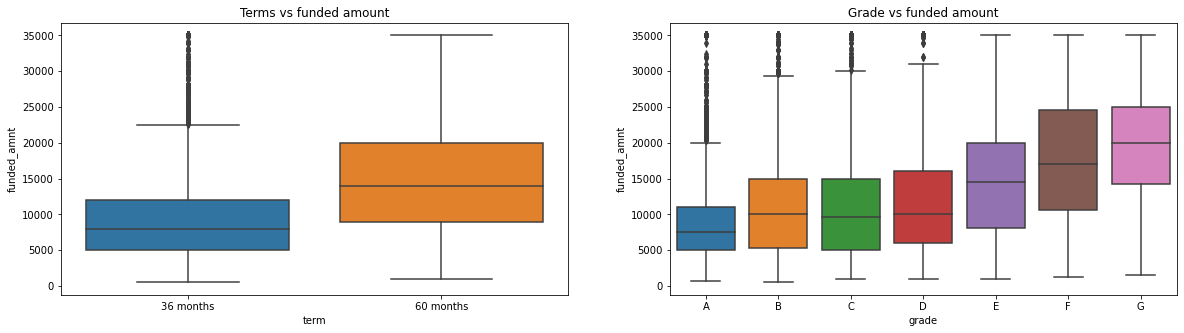

In [68]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.funded_amnt, data=data)
plt.title('Terms vs funded amount')
plt.subplot(122)
plt.title('Grade vs funded amount')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.funded_amnt, order = grade_ord, data=data)

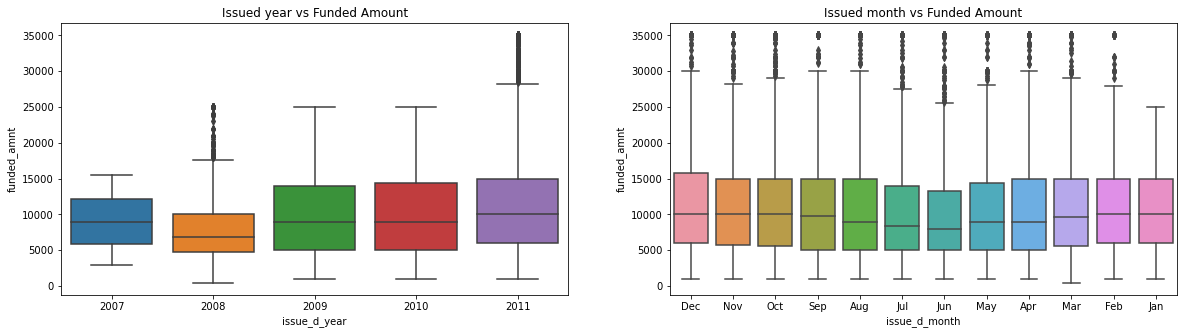

In [69]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=data.issue_d_year, y=data.funded_amnt, data=data)
plt.title('Issued year vs Funded Amount')
plt.subplot(122)
sns.boxplot(x=data.issue_d_month, y=data.funded_amnt, data=data)
plt.title('Issued month vs Funded Amount')
plt.show()

Text(0.5, 1.0, 'loan_status vs Funded amnt')

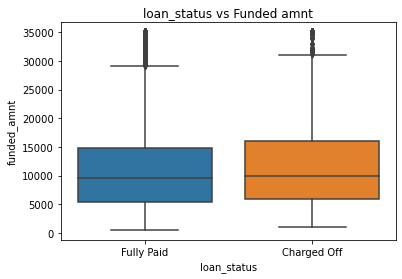

In [70]:
sns.boxplot(x='loan_status', y=data.funded_amnt, data=data)
plt.title('loan_status vs Funded amnt')

Text(0.5, 1.0, 'purpose vs funded amount')

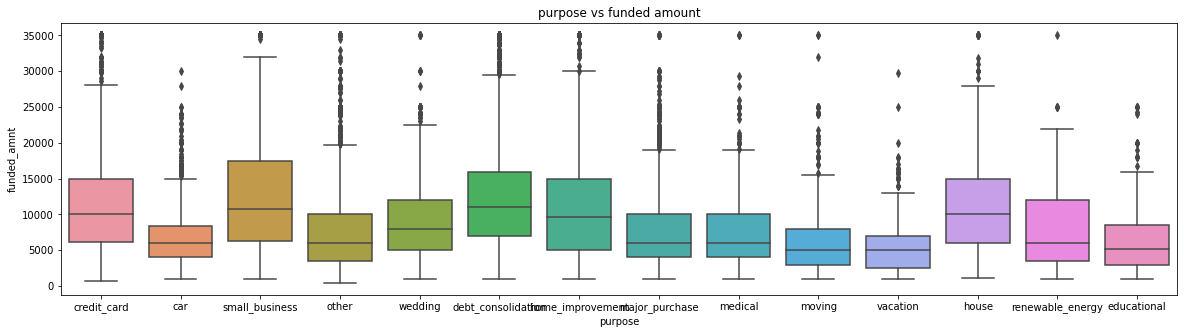

In [71]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.funded_amnt, data=data)
plt.title('purpose vs funded amount')

Text(0.5, 1.0, 'emp_length vs funded amount')

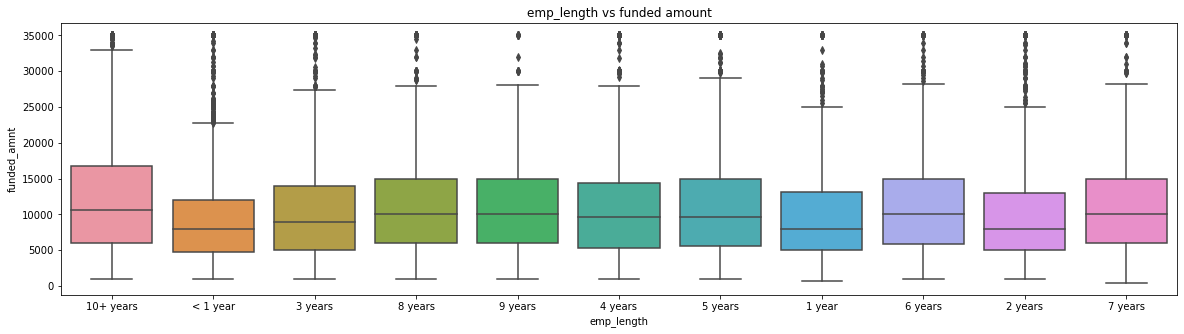

In [72]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.funded_amnt, data=data)
plt.title('emp_length vs funded amount')

**Observations:**<br>
The Funded Amount has similar observations as Loan Amount.

## int_rate

<AxesSubplot:title={'center':'Grade vs Interest Rate'}, xlabel='grade', ylabel='int_rate'>

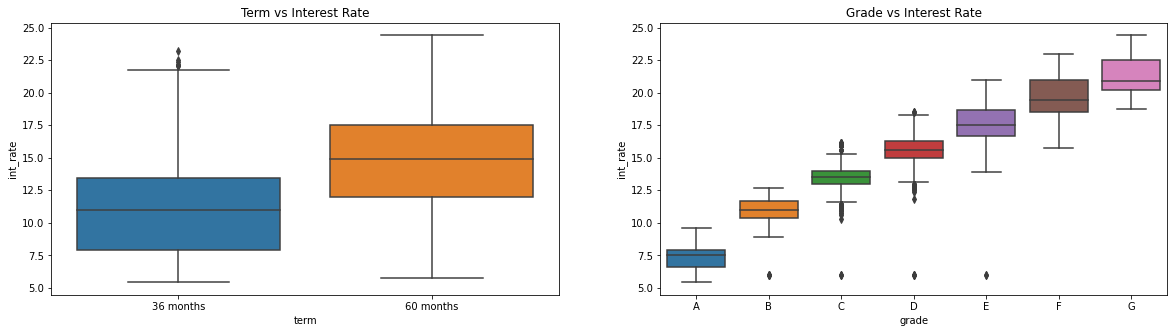

In [73]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.int_rate, data=data)
plt.title('Term vs Interest Rate')
plt.subplot(122)
plt.title('Grade vs Interest Rate')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.int_rate, order = grade_ord, data=data)

**Observation:**<br> The interest rates are higher for Higher tenure loans.
And Also Interest Rates are Higher as Grades are Lowering (A to G).

<AxesSubplot:title={'center':'verification_status vs Interest Rate'}, xlabel='verification_status', ylabel='int_rate'>

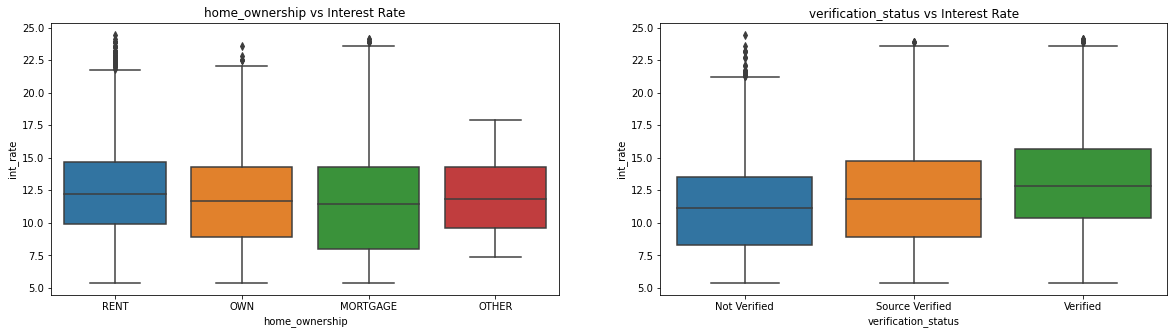

In [74]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.int_rate, data=data)
plt.title('home_ownership vs Interest Rate')
plt.subplot(122)
plt.title('verification_status vs Interest Rate')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.int_rate, order = verification_status_ord, data=data)

**Observations:**<br>

* Barrowers with Own and Mortgage got loans with less interest rates as the security will be there.
* And The Non Verified Barrowers got less interest rates compared to Verified and Source Verified barrowers.

Text(0.5, 1.0, 'loan_status vs Interest Rate')

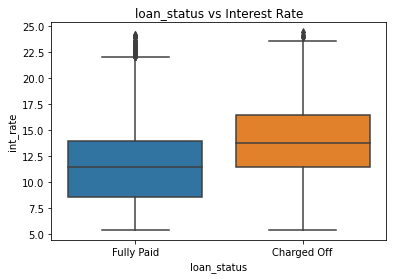

In [75]:
sns.boxplot(x='loan_status', y=data.int_rate, data=data)
plt.title('loan_status vs Interest Rate')

**Observations:**<br> This clearly tells us, grater the interest rate more the chance of Defaulting the loan.

Text(0.5, 1.0, 'purpose vs Interest Rate')

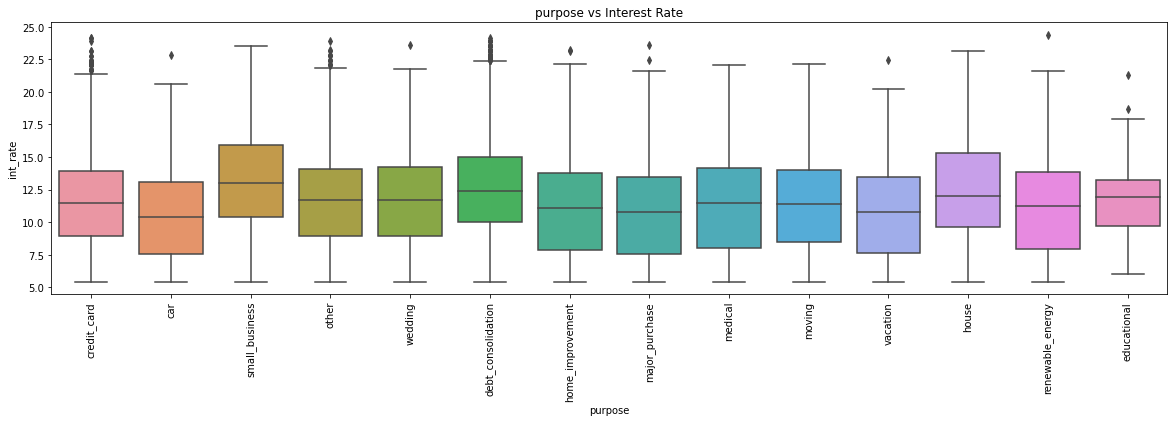

In [77]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.int_rate, data=data)
plt.xticks(rotation=90)
plt.title('purpose vs Interest Rate')

**Observations:**<br> Small Business, Debt Consolidation and House loans are given with more interest rates comparativesly others.

Text(0.5, 1.0, 'emp_length vs Interest Rate')

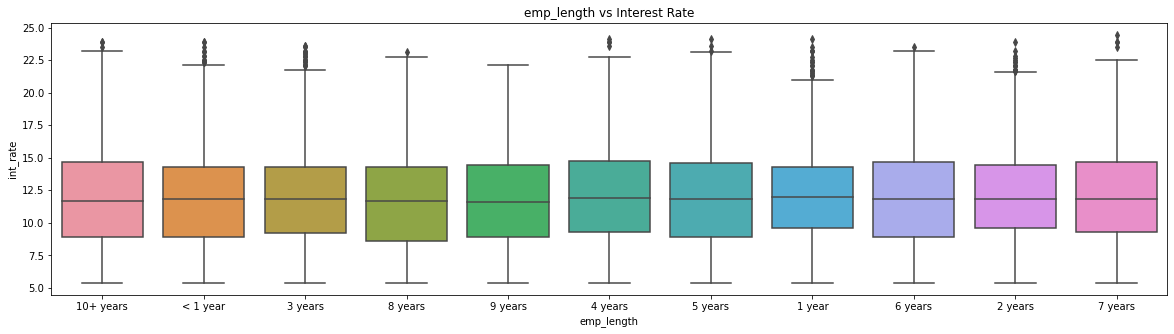

In [78]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.int_rate, data=data)
plt.title('emp_length vs Interest Rate')

**Observations:**<br> Looks like there is no much relation between Employment length and interest rate.

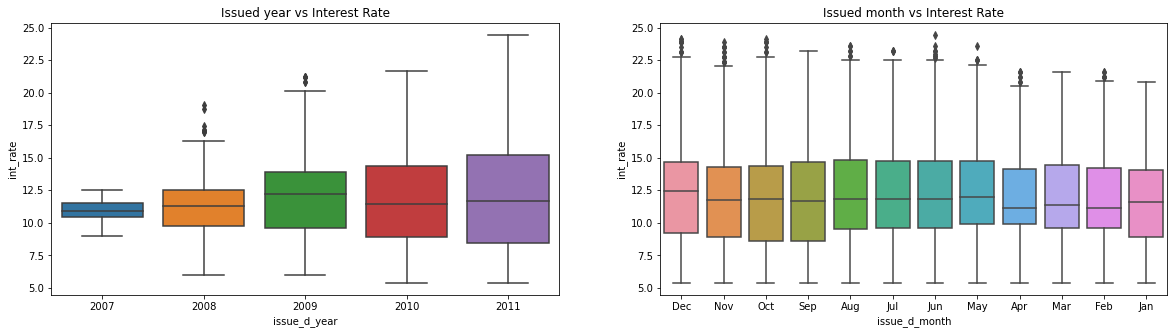

In [79]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=data.issue_d_year, y=data.int_rate, data=data)
plt.title('Issued year vs Interest Rate')
plt.subplot(122)
sns.boxplot(x=data.issue_d_month, y=data.int_rate, data=data)
plt.title('Issued month vs Interest Rate')
plt.show()

**Observations:**<br> As the years of business increase the interest rates are getting more diversed but median of of interest rate is quite same in all the years.

## annual_inc

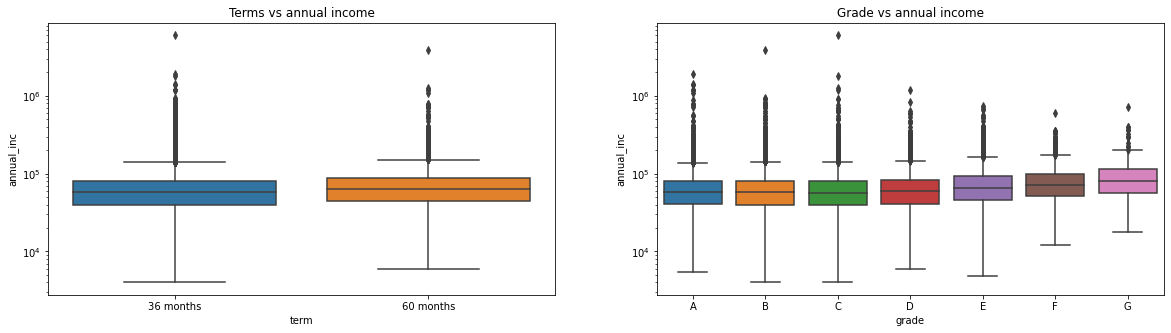

In [80]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.annual_inc, data=data)
plt.title('Terms vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('Grade vs annual income')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.annual_inc, order = grade_ord, data=data)
plt.yscale('log')

**Observations:**<br>
Comparatively Annual income is higher for lower grades.

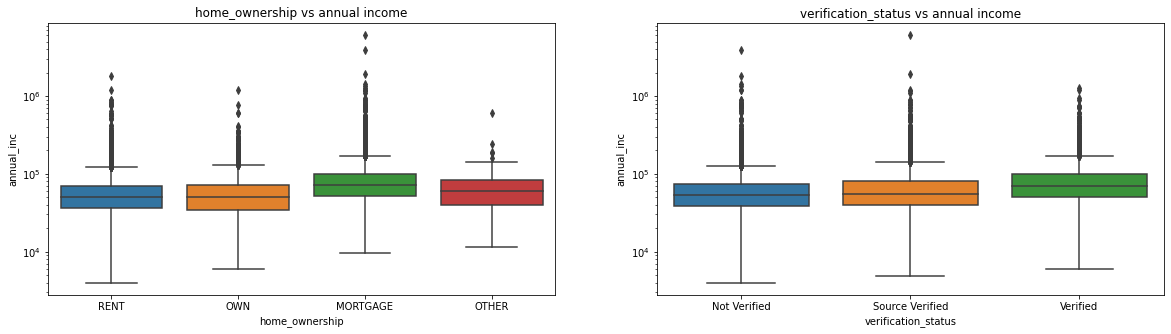

In [81]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.annual_inc, data=data)
plt.title('home_ownership vs annual income')
plt.yscale('log')
plt.subplot(122)
plt.title('verification_status vs annual income')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.annual_inc, order = verification_status_ord, data=data)
plt.yscale('log')

**Observations:**<br>
The home ownership status for MORTAGE has higher income.
The income source was verfied for most of the borrower's who had higher annual incomes.

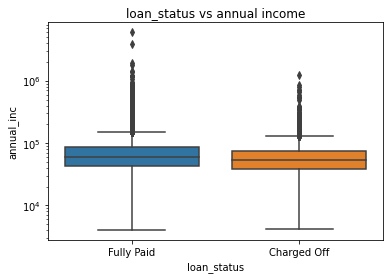

In [82]:
sns.boxplot(x='loan_status', y=data.annual_inc, data=data)
plt.title('loan_status vs annual income')
plt.yscale('log')

**Observations:**<br>
Current status of the loan is Fully paid for most of the borrower's who had higher annual incomes.

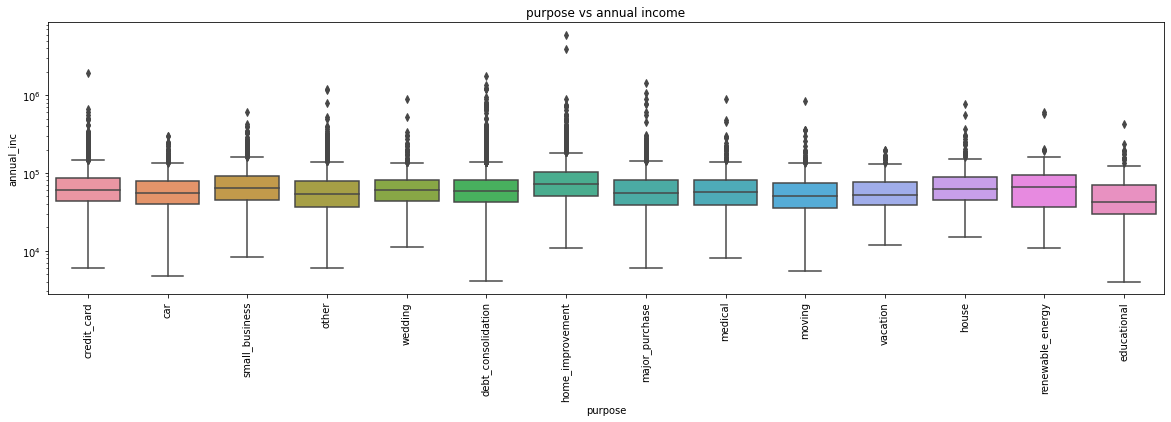

In [83]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.annual_inc, data=data)
plt.xticks(rotation=90)
plt.title('purpose vs annual income')
plt.yscale('log')

**Observations:**<br>
A category belonging to Renewable energy, small business and home improvements have higher annual income provided by the borrower for the loan request.

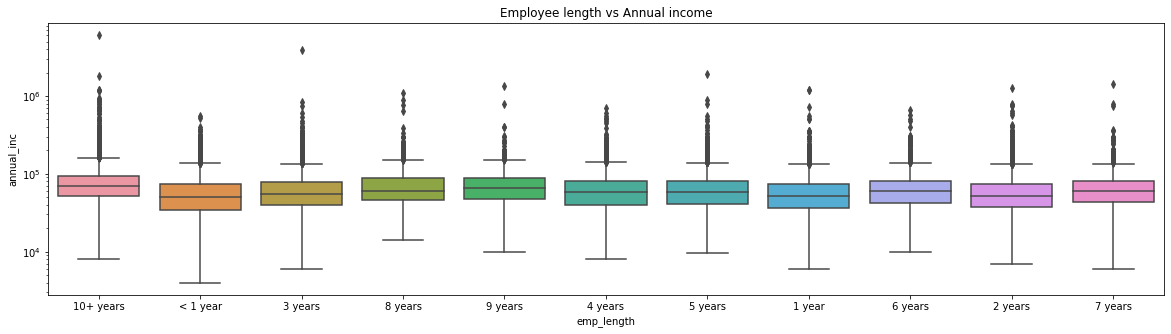

In [84]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.annual_inc, data=data)
plt.title('Employee length vs Annual income')
plt.yscale('log')

**Observations:**<br>
The borrower's who has higer income have taken loans for 10+ years of duration

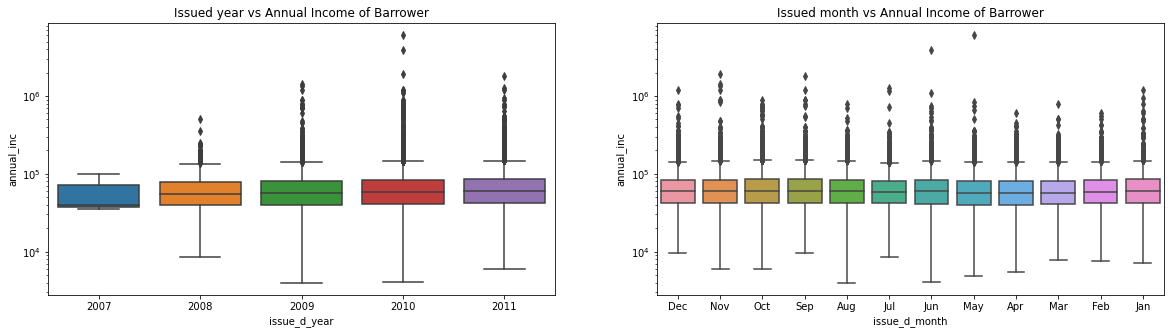

In [85]:
#Issue_d
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=data.issue_d_year, y=data.annual_inc, data=data)
plt.title('Issued year vs Annual Income of Barrower')
plt.yscale('log')
plt.subplot(122)
sns.boxplot(x=data.issue_d_month, y=data.annual_inc, data=data)
plt.title('Issued month vs Annual Income of Barrower')
plt.yscale('log')
plt.show()

**Observations:**<br>
Annual income has no impact with the month when the loan was funded

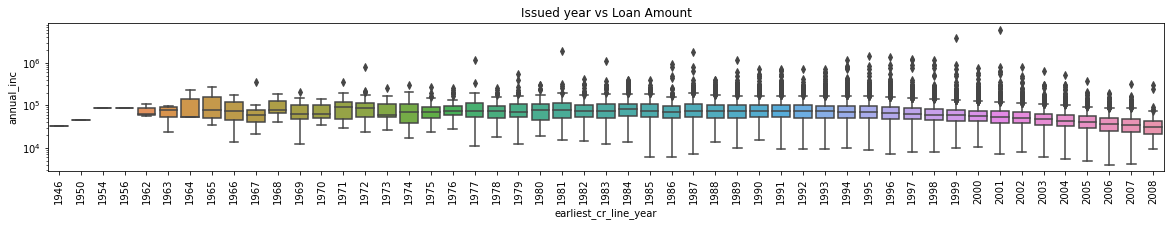

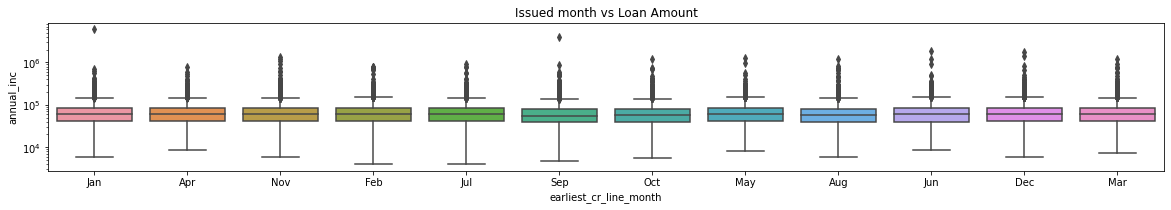

In [86]:
#earliest_cr_line
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x=data.earliest_cr_line_year, y=data.annual_inc, data=data)
plt.xticks(rotation=90)
#for better analysis plotting on log scale of y values
plt.yscale('log')
plt.title('Issued year vs Loan Amount')
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.boxplot(x=data.earliest_cr_line_month, y=data.annual_inc, data=data)
plt.title('Issued month vs Loan Amount')
plt.yscale('log')
plt.show()

**Observations:**<br>
There is not specific pattern in the annual income and earliest Credit line year and month.

## DTI
Debt to Income Ratio

<AxesSubplot:title={'center':'Grade vs dti'}, xlabel='grade', ylabel='dti'>

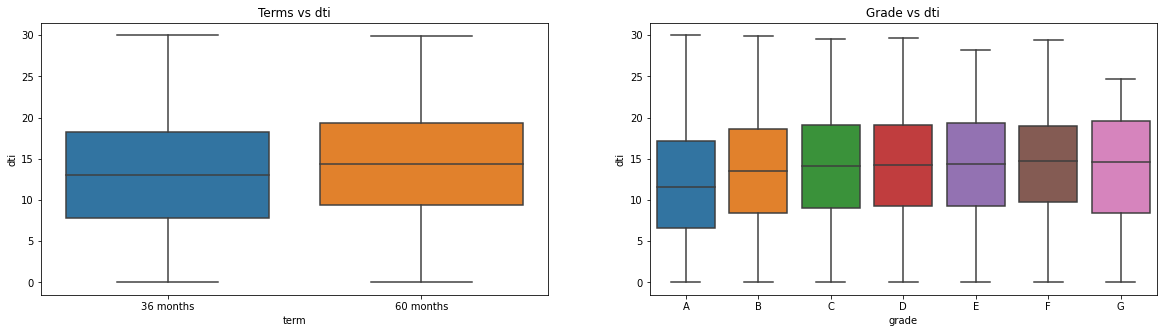

In [87]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=data.dti, data=data)
plt.title('Terms vs dti')
plt.subplot(122)
plt.title('Grade vs dti')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.boxplot(x='grade', y=data.dti, order = grade_ord, data=data)

**Observation:**<br> DTI is bit high for people who got more tenure i.e., 60 months.
A Grade barrowers are having low DTI than Other grades. DTI should be low for having high repayment percentage.

<AxesSubplot:title={'center':'verification_status vs dti'}, xlabel='verification_status', ylabel='dti'>

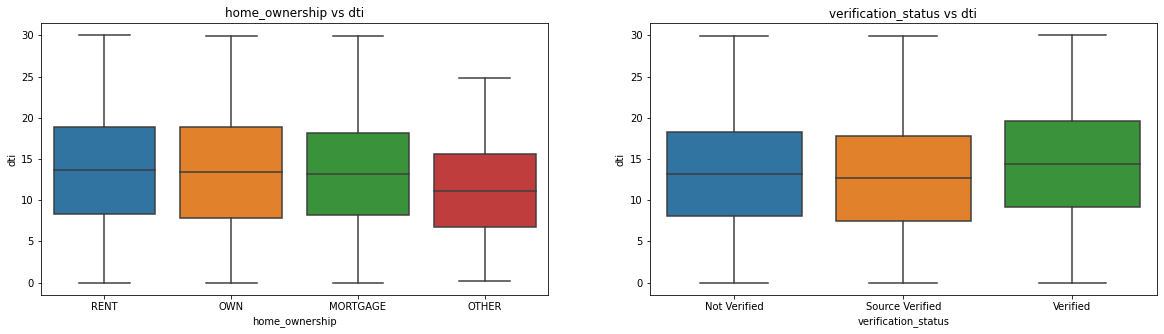

In [88]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=data.dti, data=data)
plt.title('home_ownership vs dti')
plt.subplot(122)
plt.title('verification_status vs dti')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.boxplot(x='verification_status', y=data.dti, order = verification_status_ord, data=data)

**Observations:**<br> People in Other home ownership has less DTI than others. This is may be bacause other people have mortgage and home loans.

Text(0.5, 1.0, 'loan_status vs dti')

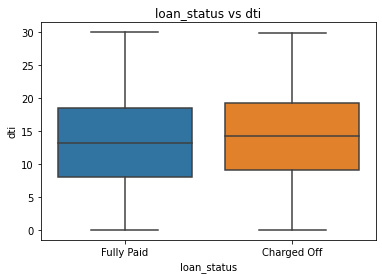

In [89]:
sns.boxplot(x='loan_status', y=data.dti, data=data)
plt.title('loan_status vs dti')

**Observations:**<br>
Borrowers with high DTI has bit more probability to default

Text(0.5, 1.0, 'purpose vs dti')

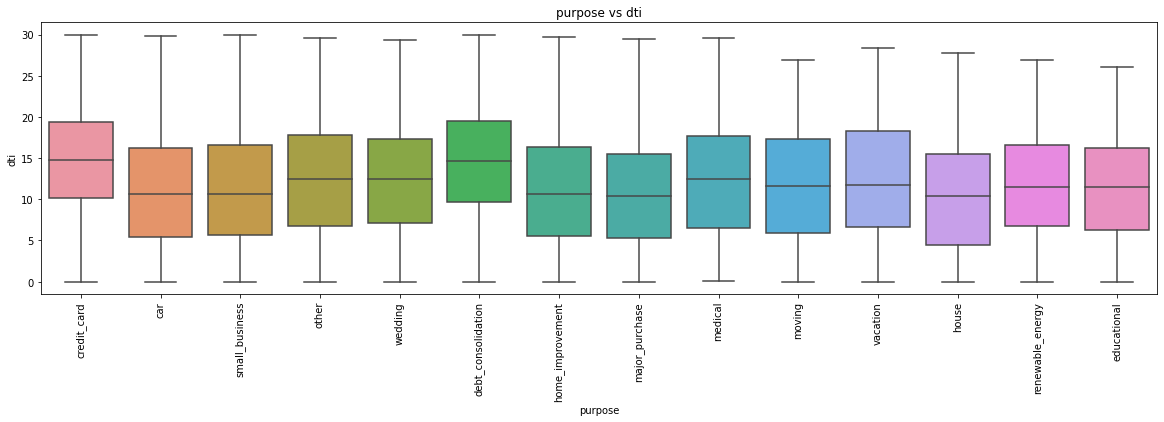

In [91]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.dti, data=data)
plt.xticks(rotation=90)
plt.title('purpose vs dti')

**Observations:**<br> People who took loan for credit card and debt consolidation purpose has more DTI than other purposes.

Text(0.5, 1.0, 'emp_length vs dti')

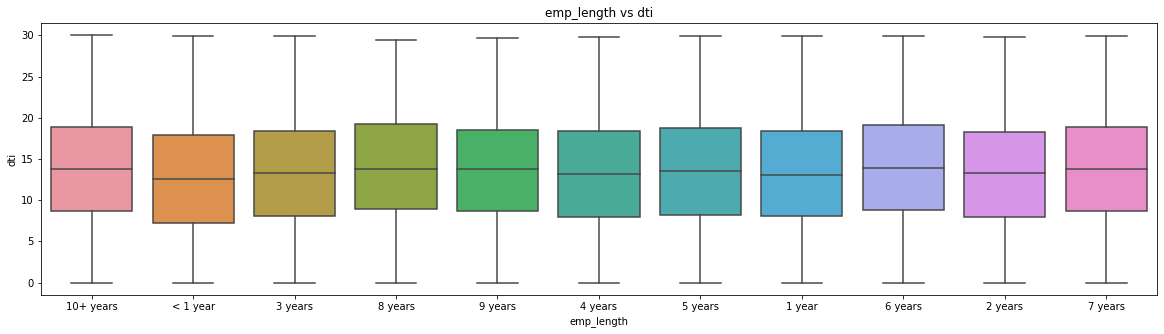

In [92]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.dti, data=data)
plt.title('emp_length vs dti')

**Observations:**<br> The dti is pretti much similar for barrowers with all the employment length.

## pub_rec
Number of derogatory public records

In [94]:
#Finding proportation of values in each value of category
df = data.groupby(['pub_rec', 'term'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
df

C:\Users\Hi\AppData\Local\Temp/ipykernel_2736/1252493587.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())


pub_rec       term     id  proportion
0        0  36 months  26152        0.75
1        0  60 months   8719        0.25
2        1  36 months   1349        0.72
3        1  60 months    526        0.28
4        2  36 months     36        0.80
5        2  60 months      9        0.20
6        3  36 months      7        1.00
7        4  36 months      2        1.00

C:\Users\Hi\AppData\Local\Temp/ipykernel_2736/99024810.py:7: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())


<AxesSubplot:title={'center':'Grade vs Public records'}, xlabel='pub_rec', ylabel='proportion'>

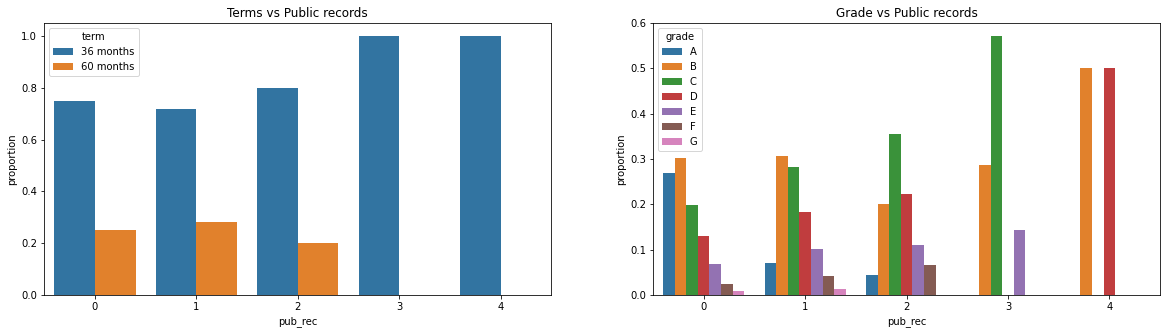

In [95]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='term', data=df)
plt.title('Terms vs Public records')

df = data.groupby(['pub_rec', 'grade'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
plt.subplot(122)
plt.title('Grade vs Public records')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.barplot(x='pub_rec', y='proportion', hue='grade', data=df)

**Observations:**<br>

* Borrwers higher public derogatory records took loan for 36 months tenure. where as 80% and 20% distribution between 36 and 60months tenure for lower public derogatory records borrowers.
* We can see the grades are really showing some pattern. A grade people are having less derogatory records then other grades.
* Exceptionally C,D,E graded people are having high pub_recs.

C:\Users\Hi\AppData\Local\Temp/ipykernel_2736/1804208722.py:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
C:\Users\Hi\AppData\Local\Temp/ipykernel_2736/1804208722.py:10: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())


Text(0.5, 1.0, 'Verification status vs Public records')

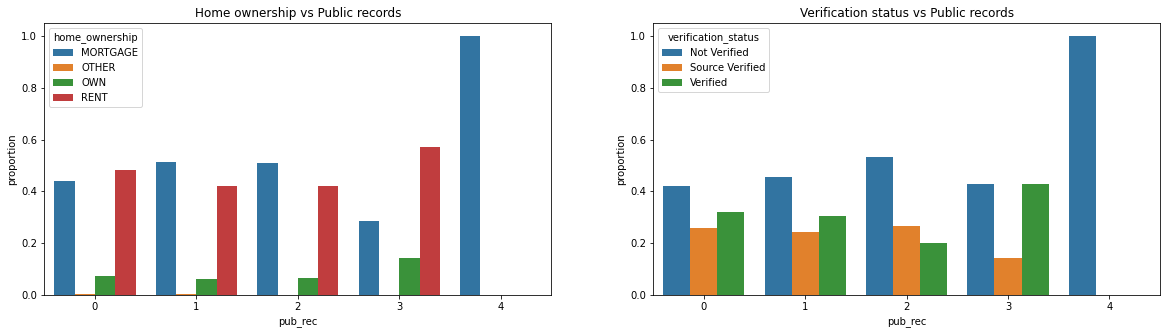

In [96]:
plt.figure(figsize=(20,5))
plt.subplot(121)

df = data.groupby(['pub_rec', 'home_ownership'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
sns.barplot(x='pub_rec', y='proportion', hue='home_ownership', data=df)
plt.title('Home ownership vs Public records')

df = data.groupby(['pub_rec', 'verification_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
plt.subplot(122)
sns.barplot(x='pub_rec', y='proportion', hue='verification_status', data=df)

plt.title('Verification status vs Public records')

**Observations:**<br> Borrowers with 4 public Derogatory records are high in mortgage owned house category and also Not verified Catogry of verification status.

C:\Users\Hi\AppData\Local\Temp/ipykernel_2736/3189158275.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())
C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0.98, 'loan status vs Public records')

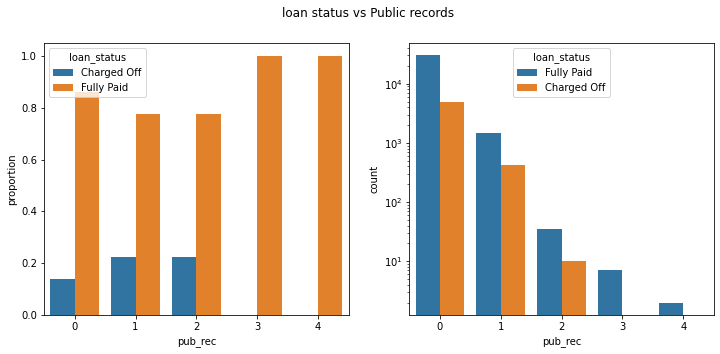

In [97]:
#Proportion of values for each category
df = data.groupby(['pub_rec', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())

plt.figure(figsize=(12,5))
plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='loan_status', data=df)

plt.subplot(122)
sns.countplot(data.pub_rec, hue='loan_status', data=data)
plt.yscale('log')
plt.suptitle('loan status vs Public records')

**Observations:**<br> The there is increase in deafulted loans for people with derogatory records from 0 to 2 but it is not there for pub_rec 3 adn 4, this is because there very few people took loans in those pub_rec numbers where are as from most borrowers are in 0 pub_rec category.

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Purpose vs Public records')

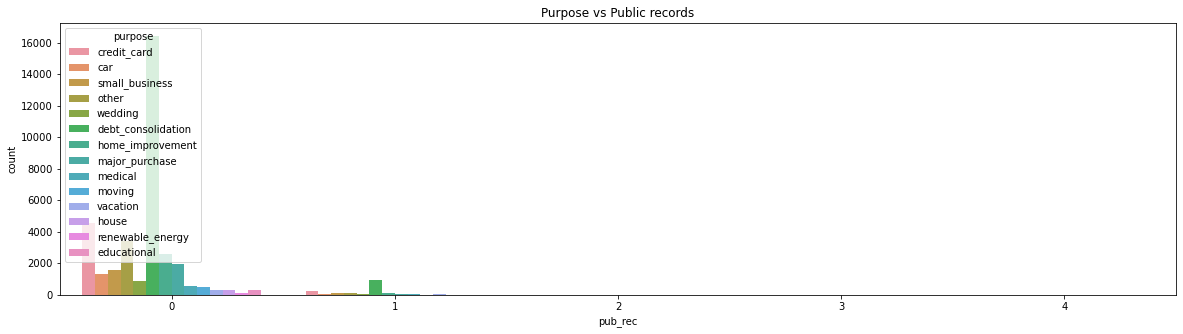

In [98]:
plt.figure(figsize=(20,5))
sns.countplot(data.pub_rec, hue='purpose', data=data)
plt.title('Purpose vs Public records')

C:\Users\Hi\AppData\Local\Temp/ipykernel_2736/15034377.py:4: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())


Text(0.5, 1.0, 'Employee length vs Public records')

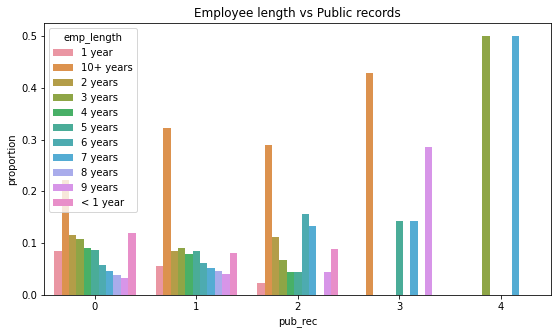

In [99]:
plt.figure(figsize=(20,5))
#Proportion of values for each category
df = data.groupby(['pub_rec', 'emp_length'], as_index=False)['id'].count()
df['proportion'] = df.groupby('pub_rec').transform(lambda x: x/x.sum())

plt.subplot(121)
sns.barplot(x='pub_rec', y='proportion', hue='emp_length', data=df)
plt.title('Employee length vs Public records')

## pub_rec_bankruptcies
Number of public record bankruptcies

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Grade vs Public record bankruptcies'}, xlabel='pub_rec_bankruptcies', ylabel='count'>

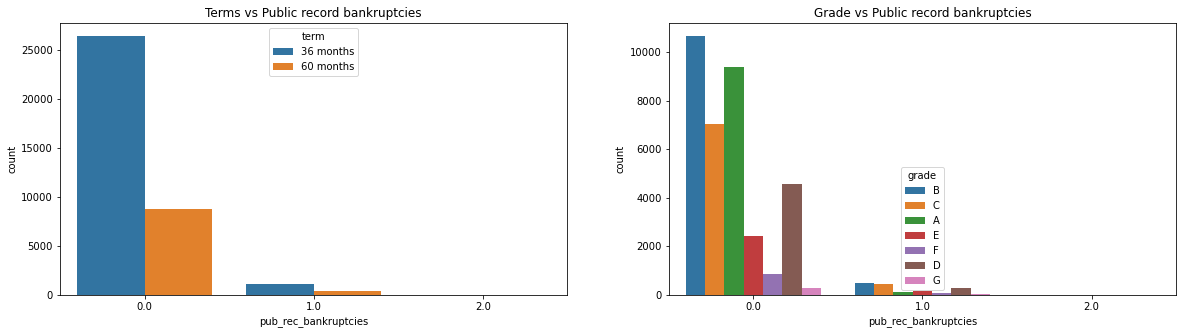

In [100]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(data.pub_rec_bankruptcies, hue='term', data=data)
plt.title('Terms vs Public record bankruptcies')
plt.subplot(122)
plt.title('Grade vs Public record bankruptcies')
grade_ord = data.grade.unique()
grade_ord.sort()
sns.countplot(data.pub_rec_bankruptcies, hue='grade', data=data)

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Verification status vs Public record bankruptcies'}, xlabel='pub_rec_bankruptcies', ylabel='count'>

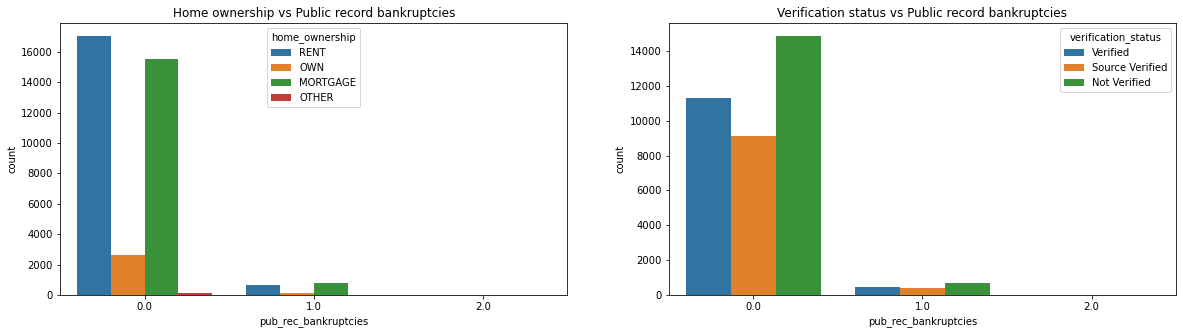

In [102]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(data.pub_rec_bankruptcies, hue='home_ownership', data=data)
plt.title('Home ownership vs Public record bankruptcies')
plt.subplot(122)
plt.title('Verification status vs Public record bankruptcies')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.countplot(data.pub_rec_bankruptcies, hue='verification_status', data=data)

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Verification status vs Public record bankruptcies'}, xlabel='pub_rec_bankruptcies', ylabel='count'>

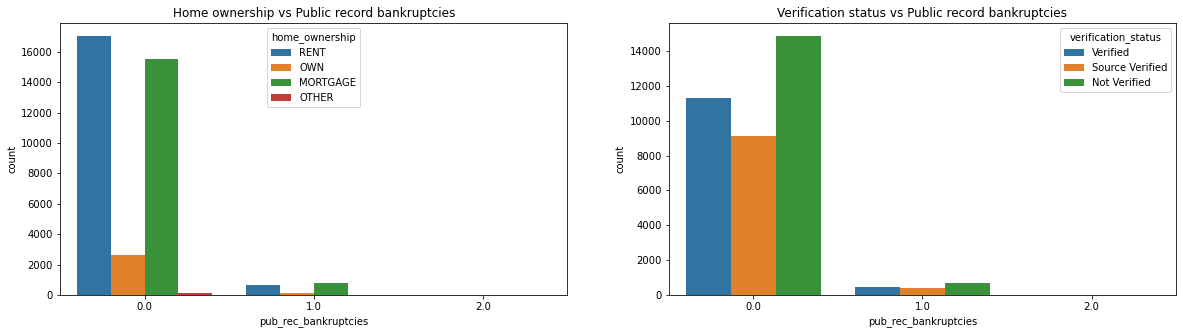

In [103]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(data.pub_rec_bankruptcies, hue='home_ownership', data=data)
plt.title('Home ownership vs Public record bankruptcies')
plt.subplot(122)
plt.title('Verification status vs Public record bankruptcies')
verification_status_ord = data.verification_status.unique()
verification_status_ord.sort()
sns.countplot(data.pub_rec_bankruptcies, hue='verification_status', data=data)

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'loan status vs Public record bankruptcies')

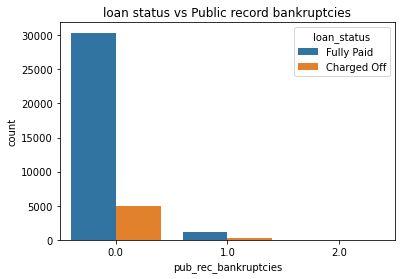

In [104]:
sns.countplot(data.pub_rec_bankruptcies, hue='loan_status', data=data)
plt.title('loan status vs Public record bankruptcies')

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Purpose vs Public record bankruptcies')

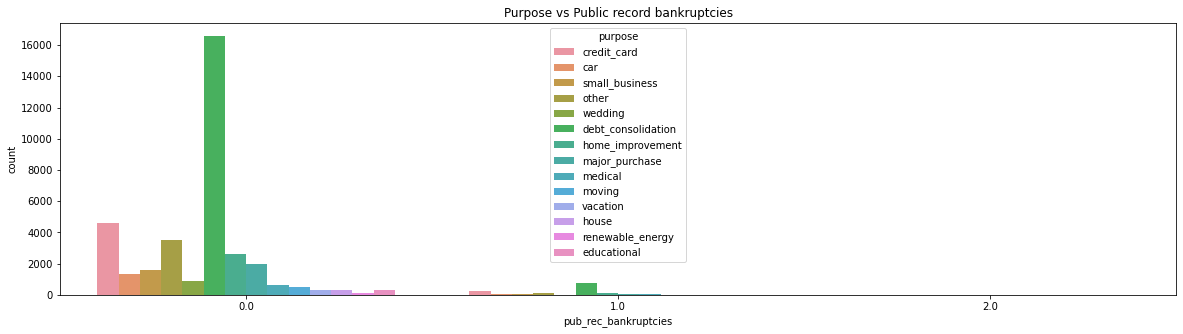

In [105]:
plt.figure(figsize=(20,5))
sns.countplot(data.pub_rec_bankruptcies, hue='purpose', data=data)
plt.title('Purpose vs Public record bankruptcies')

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Employee length vs Public record bankruptcies')

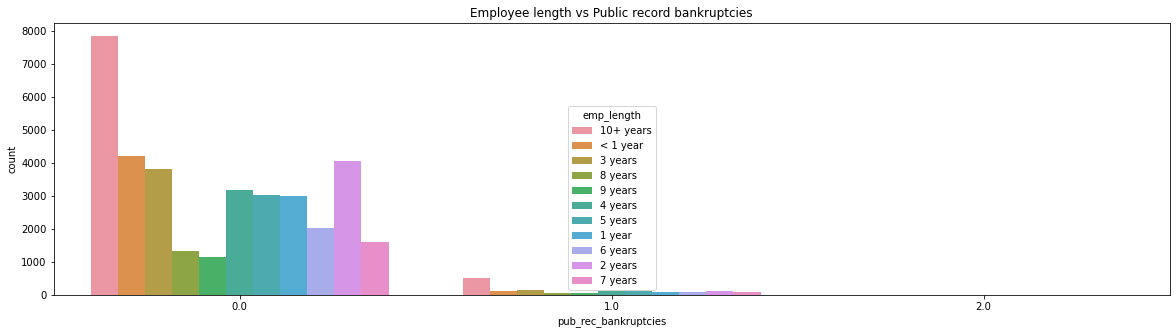

In [106]:
plt.figure(figsize=(20,5))
sns.countplot(data.pub_rec_bankruptcies, hue='emp_length', data=data)
plt.title('Employee length vs Public record bankruptcies')

## inq_last_6mths

C:\Users\Hi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


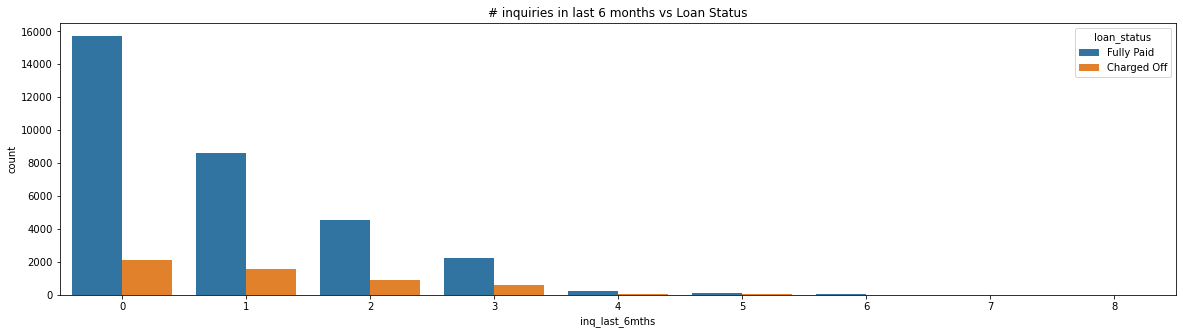

In [107]:
plt.figure(figsize=(20,5))
sns.countplot(data.inq_last_6mths, hue='loan_status', data=data)
plt.title('# inquiries in last 6 months vs Loan Status')
plt.show()

## Approval Loan Amount Ratio

plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=data.approved_loan_amnt_ratio, data=data)
plt.title('emp_length vs Approval Loan Amount Ratio')

**Observations:**<br> There is not much relation between approval of loan amount ratio and employment length

Text(0.5, 1.0, 'Purpose vs Approval Loan Amount Ratio')

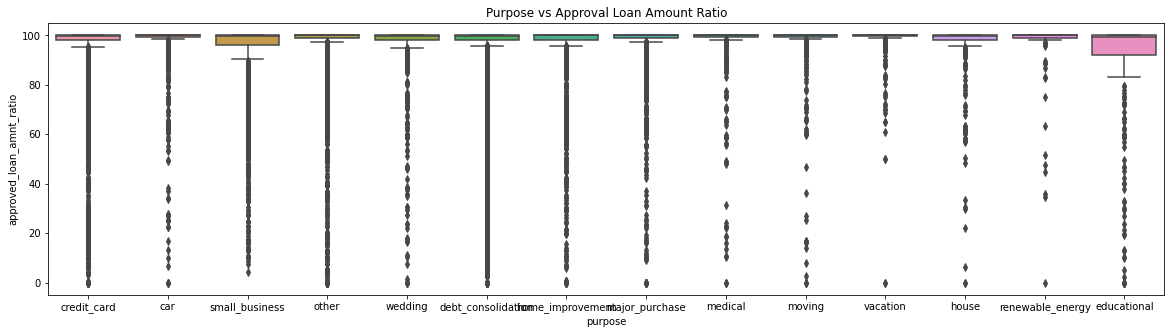

In [109]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=data.approved_loan_amnt_ratio, data=data)
plt.title('Purpose vs Approval Loan Amount Ratio')

**Observations:**<br> The Funded amount by investors is lower than requested loan amount in education and small business purposes.

Text(0.5, 1.0, 'Home Ownership vs Approval Loan Amount Ratio')

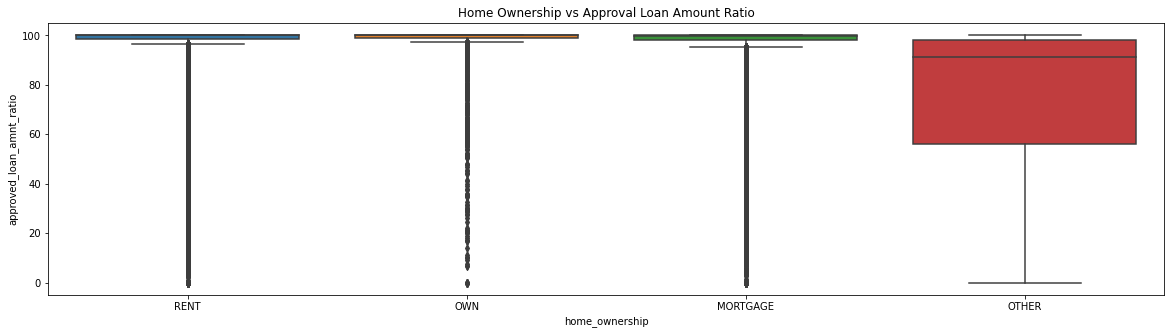

In [110]:
plt.figure(figsize=(20,5))
sns.boxplot(x='home_ownership', y=data.approved_loan_amnt_ratio, data=data)
plt.title('Home Ownership vs Approval Loan Amount Ratio')

**Observations:**<br> Borrowers with Other home ownership are having less approved ratio which mean they got less amount than request amount.

<hr>

# Bivariate Analysis

## Term vs Loan Status

C:\Users\Hi\AppData\Local\Temp/ipykernel_2736/4274992404.py:3: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df['proportion'] = df.groupby('term').transform(lambda x: x/x.sum())


Text(0.5, 1.0, 'Term vs Loan status')

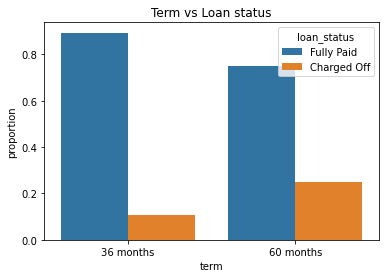

In [112]:
#Proportion of values for each category
df = data.groupby(['term', 'loan_status'], as_index=False)['id'].count()
df['proportion'] = df.groupby('term').transform(lambda x: x/x.sum())
sns.barplot(x='term', y='proportion', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])

plt.title('Term vs Loan status')

**Observations:**<br> Looks like there are more proportion of borrowers defaulted loan in 60 months term then 36 months. Also the Fully Paid rate is higher in 36 months tenure.

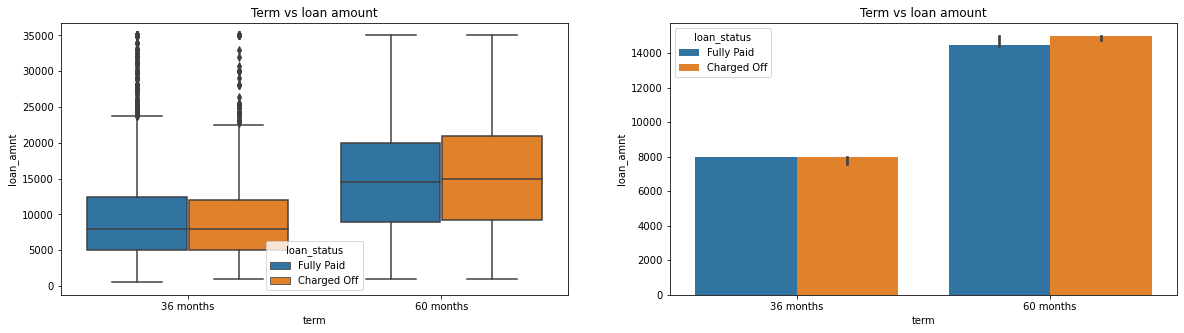

In [113]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='loan_amnt', hue='loan_status', data=data)
plt.title('Term vs loan amount')
plt.subplot(122)
sns.barplot(x='term', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

**Observations:**<br> 
* Loan amount is not a decider for defaults in both 36 adn 60 months.
* Borrowers have equal distribtion is both default and non default for 36 and 60 months tenures.

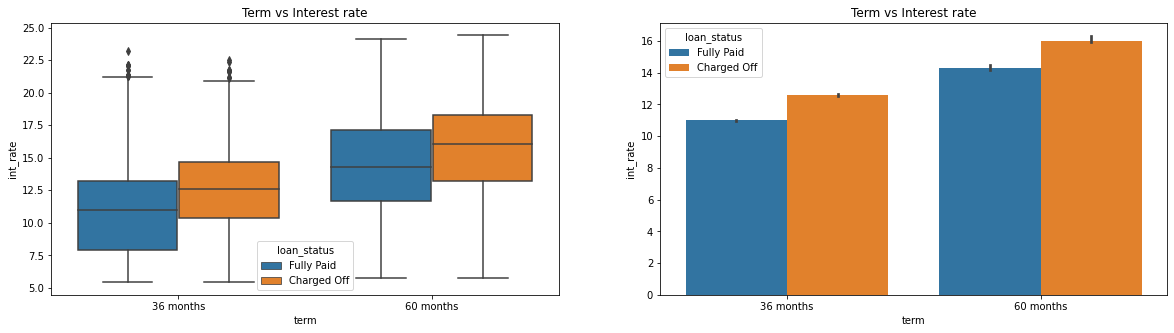

In [114]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='int_rate', hue='loan_status', data=data)
plt.title('Term vs Interest rate')
plt.subplot(122)
sns.barplot(x='term', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs Interest rate')
plt.show()

**Observations:**<br>
For higher interest rates the deafult rate is higher in both 36 and 60 months tenure.

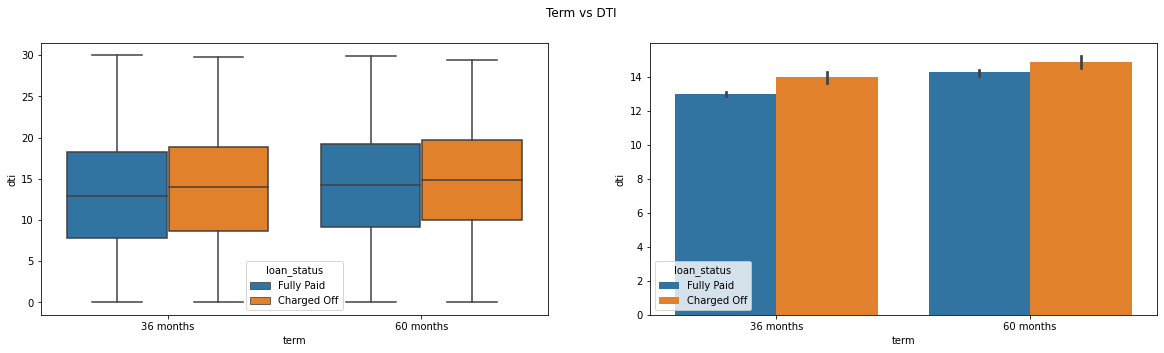

In [115]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='term', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('Term vs DTI')
plt.show()

**Observations:**<br>
Comparitively charge-off are higher when compared with fully-paid for the Debit to income ratio.

## Grade

In [116]:
#Sorting Grades from A to G
grade_ord = data.grade.unique()
grade_ord.sort()

C:\Users\Hi\AppData\Local\Temp/ipykernel_2736/2522014393.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df['percentage'] = df.groupby('grade').transform(lambda x: x/x.sum())


Text(0.5, 1.0, 'Grade vs Loan status')

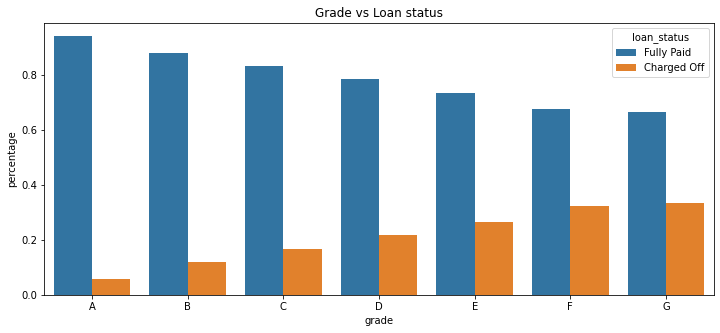

In [117]:
df = data.groupby(['grade', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('grade').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='grade', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Grade vs Loan status')

**Observations:**<br>
The above graph clearly says the Charged off increases as grades decreases.

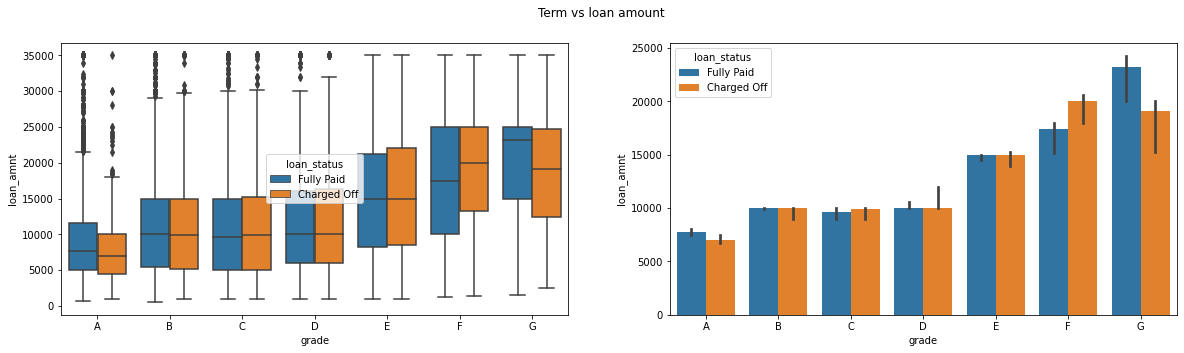

In [118]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='loan_amnt', hue='loan_status', data=data, order = grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='loan_amnt', hue='loan_status', data=data, estimator=np.median, order = grade_ord)
plt.suptitle('Term vs loan amount')
plt.show()

**Observations:**<br>

* For lower grades 'F' and 'G' there are more difference between charged-off and fully paid.
* The lower grade people has taken higher amount of loans and also they are more prone to default the loan.

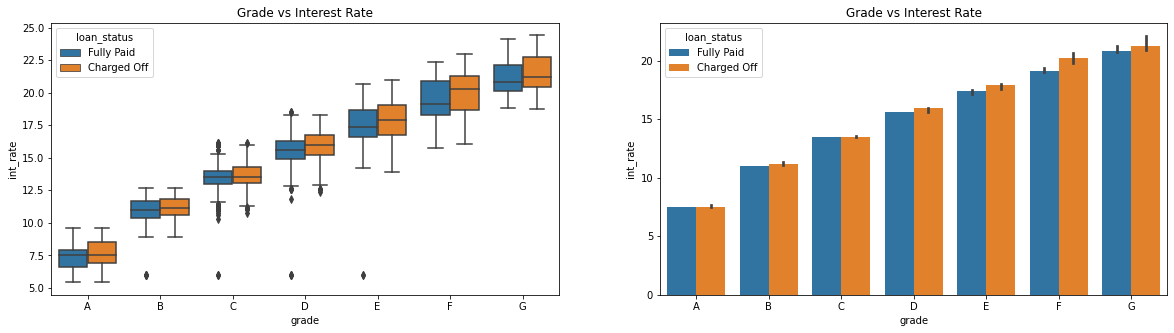

In [119]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='int_rate', hue='loan_status', data=data, order = grade_ord)
plt.title('Grade vs Interest Rate')
plt.subplot(122)
sns.barplot(x='grade', y='int_rate', hue='loan_status', data=data, order = grade_ord, estimator=np.median)
plt.title('Grade vs Interest Rate')
plt.show()

**Observations:**<br>
As grade decreases the interest rate gradually increases. and they are more and more prone to default the loan.

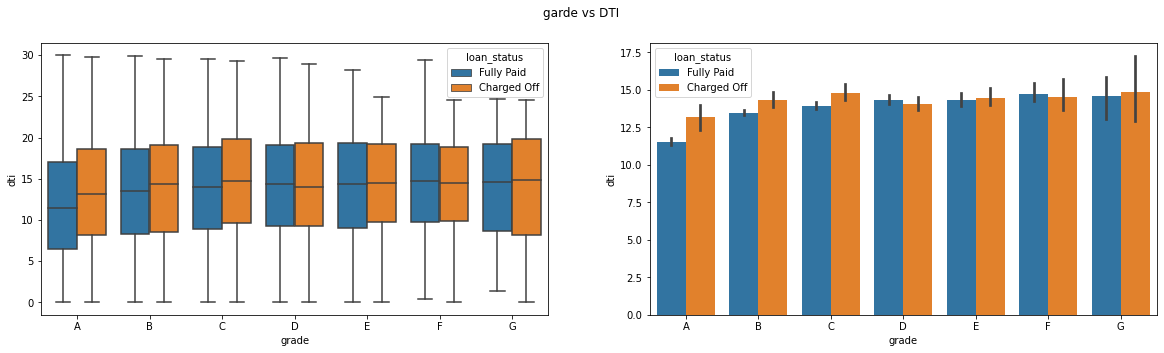

In [120]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='grade', y='dti', hue='loan_status', data=data, order=grade_ord)
plt.subplot(122)
sns.barplot(x='grade', y='dti', hue='loan_status', data=data, estimator=np.median, order = grade_ord)
plt.suptitle('garde vs DTI')
plt.show()

**Observations:**<br>
There is not much change in dti in each grade and loan status.

# Employment Length

C:\Users\Hi\AppData\Local\Temp/ipykernel_2736/3756688468.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df['percentage'] = df.groupby('emp_length').transform(lambda x: x/x.sum())


Text(0.5, 1.0, 'Grade vs Loan status')

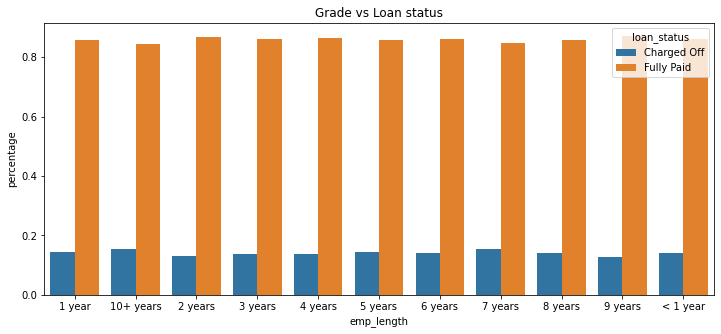

In [121]:
df = data.groupby(['emp_length', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('emp_length').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='emp_length', y='percentage', hue='loan_status', data=df)
plt.title('Grade vs Loan status')

**Observations:**<br> There is not big changes or pattern observed defaulters across employment lengths.

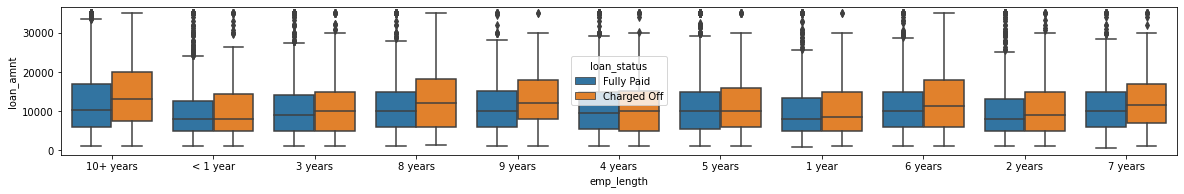

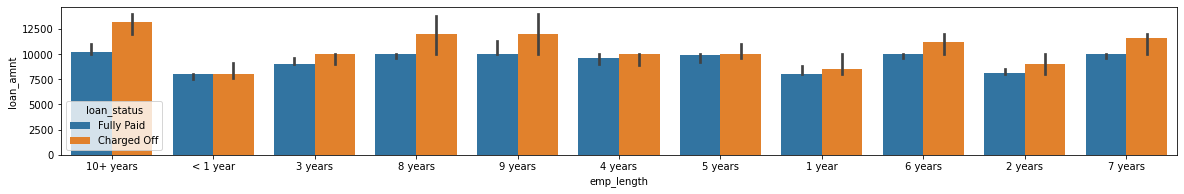

In [122]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x='emp_length', y='loan_amnt', hue='loan_status', data=data)
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.barplot(x='emp_length', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.show()

**Observations:**<br>
Borrowers with higher employment lengths and took more loan amounts got more default rate.

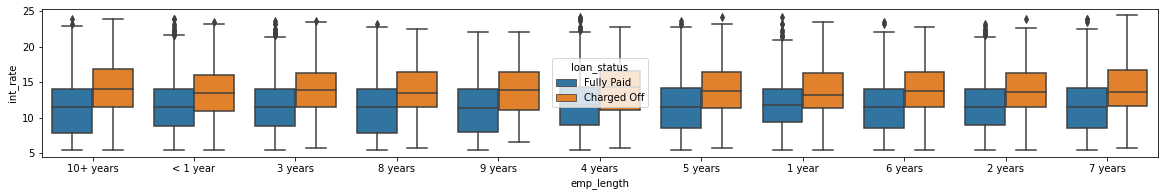

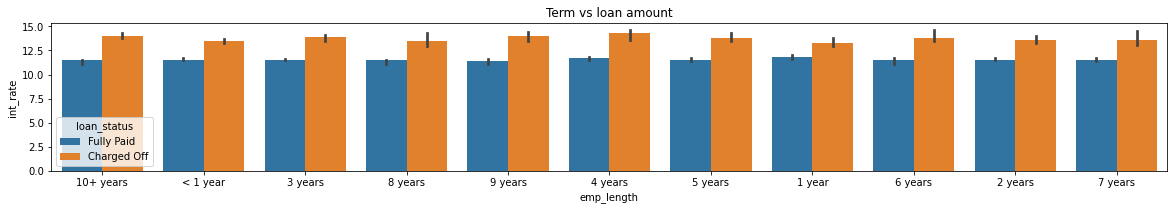

In [123]:
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.boxplot(x='emp_length', y='int_rate', hue='loan_status', data=data)
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.barplot(x='emp_length', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.title('Term vs loan amount')
plt.show()

**Observations:**<br> Irrespictive of employment length loans with more interest rates got defaulted more.

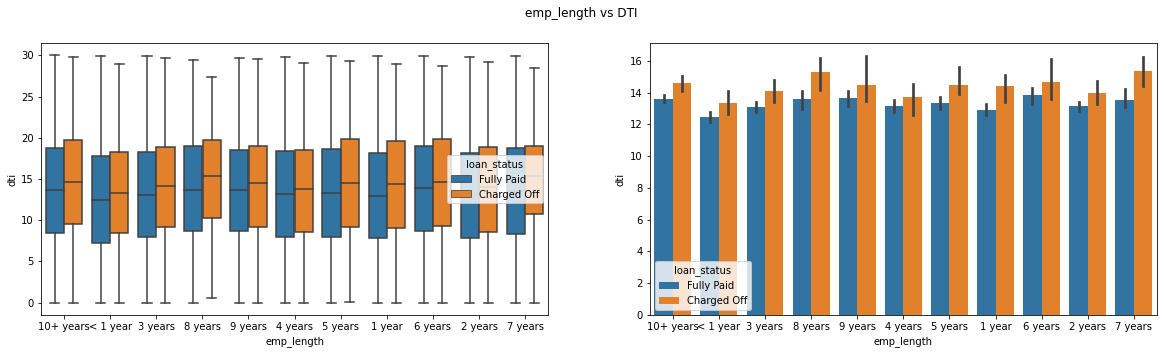

In [124]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='emp_length', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='emp_length', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('emp_length vs DTI')
plt.show()

**Observations:**<br>
Employment Length and DTI are not showing any patterns towards defaults.

## Home Ownership

C:\Users\Hi\AppData\Local\Temp/ipykernel_2736/2695638706.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df['percentage'] = df.groupby('home_ownership').transform(lambda x: x/x.sum())


Text(0.5, 1.0, 'Home Ownership vs Loan status')

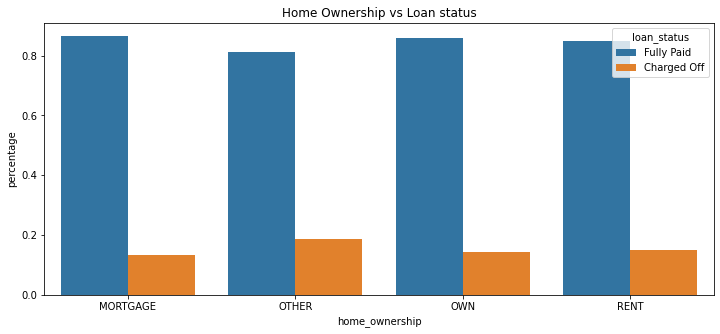

In [125]:
df = data.groupby(['home_ownership', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('home_ownership').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='home_ownership', y='percentage', hue='loan_status', data=df, hue_order = ['Fully Paid', 'Charged Off'])
plt.title('Home Ownership vs Loan status')

**Observations:**<br>
There is bit high percentage of defaults are recorded in other home ownership category.

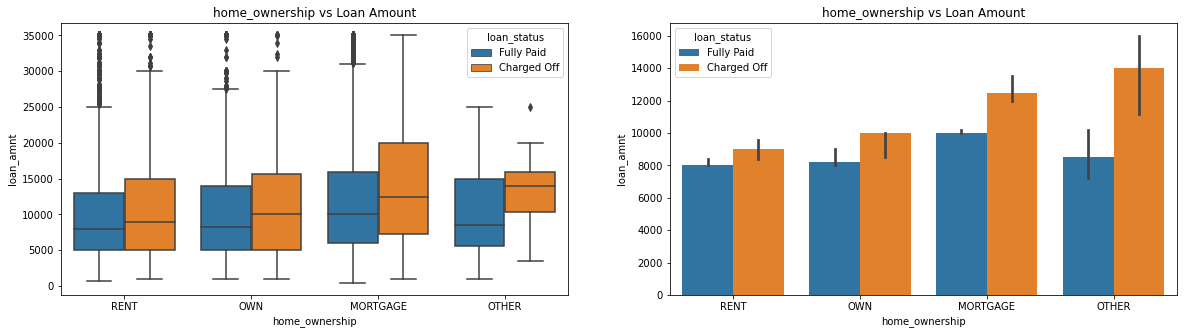

In [126]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=data)
plt.title('home_ownership vs Loan Amount')
plt.subplot(122)
sns.barplot(x='home_ownership', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.title('home_ownership vs Loan Amount')
plt.show()

**Observations:**<br>
Borrowers who took higher loan amounts defaulted more than others.

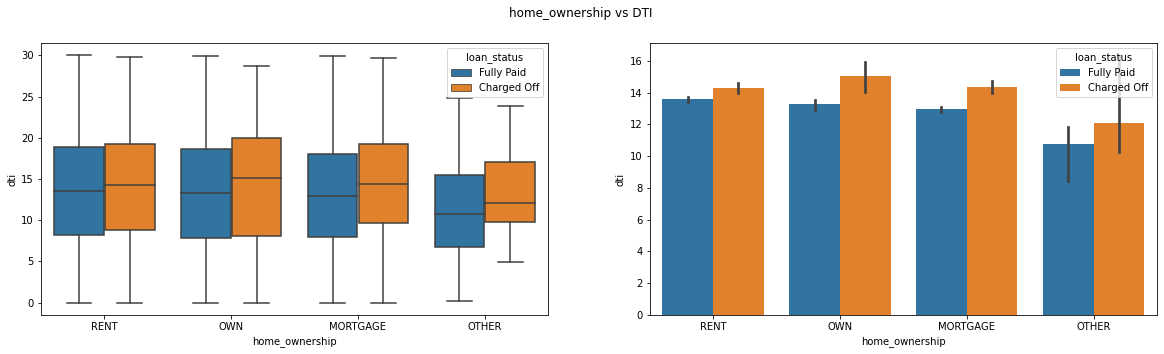

In [127]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='home_ownership', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('home_ownership vs DTI')
plt.show()

**Observations:**<br>

* Borrowers in other home ownership category has less dti than other categories.
* There is equal posibility of home owners defaulting for all the home ownerships.

## Address State

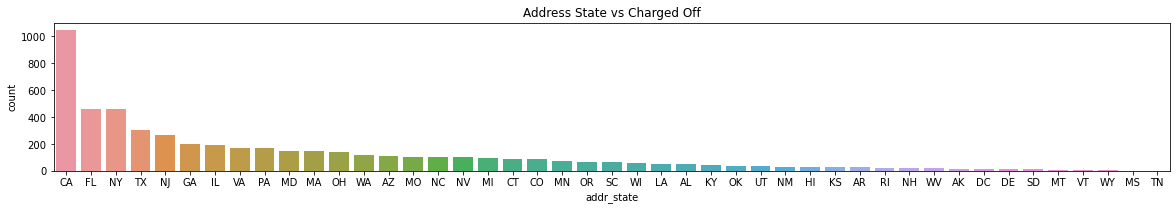

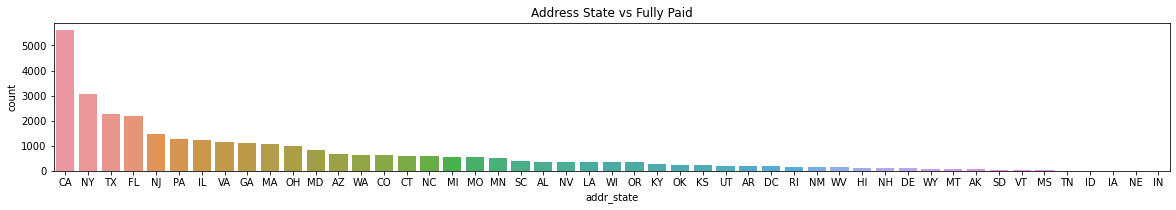

In [128]:
charged_off_df = data[data.loan_status.values == 'Charged Off']
plt.figure(figsize=(20,6))
plt.subplot(211)
sns.countplot(x='addr_state', data=charged_off_df, order=charged_off_df.addr_state.value_counts().index)
plt.title('Address State vs Charged Off')

fp_df = data[data.loan_status.values == 'Fully Paid']
plt.figure(figsize=(20,6))
plt.subplot(212)
sns.countplot(x='addr_state', data=fp_df, order=fp_df.addr_state.value_counts().index)
plt.title('Address State vs Fully Paid')
plt.show()

**Observations:**<br> More number of borrowers defaulted in CA , FL and NY states.

## Verfication Status

C:\Users\Hi\AppData\Local\Temp/ipykernel_2736/3592038875.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df['percentage'] = df.groupby('verification_status').transform(lambda x: x/x.sum())


Text(0.5, 1.0, 'Grade vs Loan status')

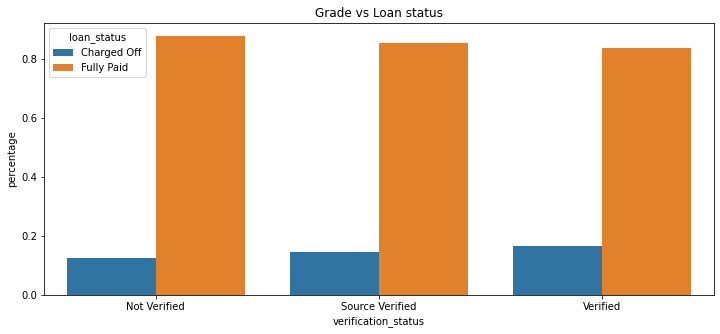

In [129]:
df = data.groupby(['verification_status', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('verification_status').transform(lambda x: x/x.sum())
plt.figure(figsize=(12,5))
sns.barplot(x='verification_status', y='percentage', hue='loan_status', data=df)
plt.title('Grade vs Loan status')

**Observations:**<br>
There isn't big change in charged of loans for all varification status.

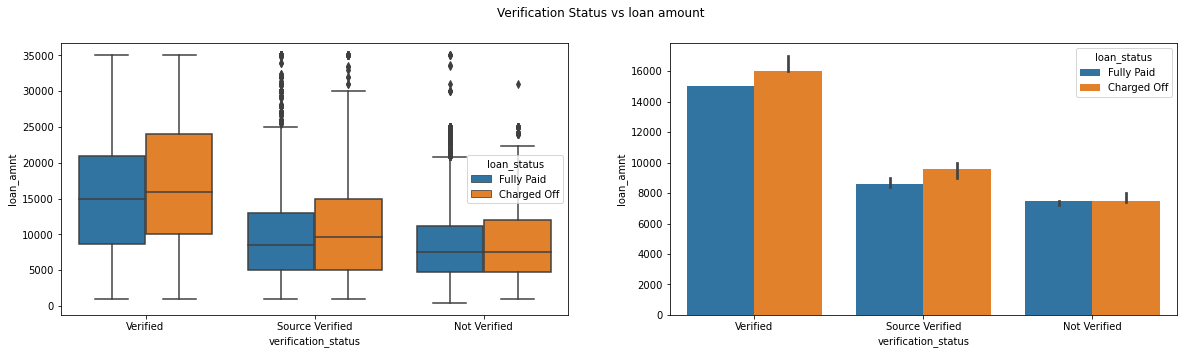

In [130]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='loan_amnt', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='verification_status', y='loan_amnt', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('Verification Status vs loan amount')
plt.show()

**Observations:**<br>

* Verified loans are given more loan amounts compared to others.
* There is a slight increase in loan amount for verified and source verified loan when they are defaulted.

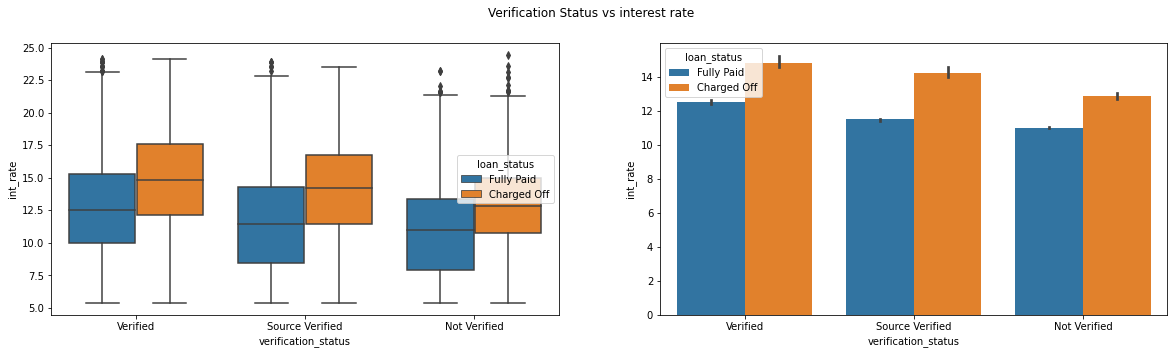

In [131]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='int_rate', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='verification_status', y='int_rate', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('Verification Status vs interest rate')
plt.show()

**Observations:**<br>
Irrespective of verification status higher interest rates are incurring default of loan.

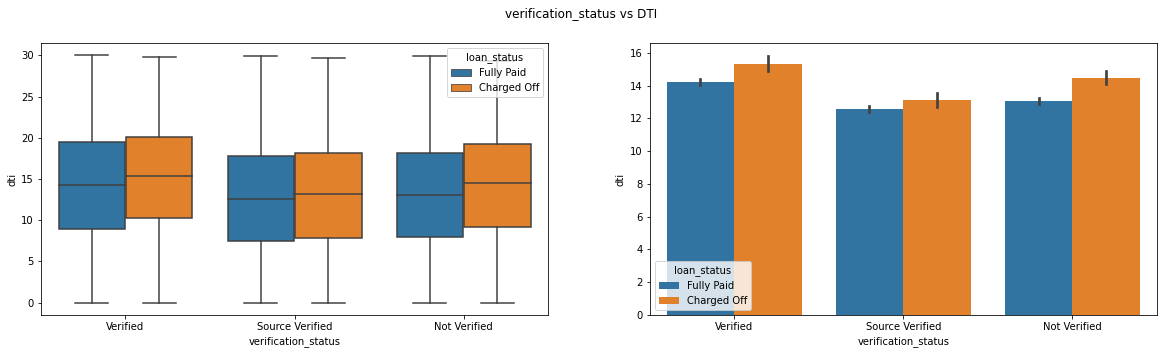

In [132]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='verification_status', y='dti', hue='loan_status', data=data)
plt.subplot(122)
sns.barplot(x='verification_status', y='dti', hue='loan_status', data=data, estimator=np.median)
plt.suptitle('verification_status vs DTI')
plt.show()

**Observations:**<br>
There is slight increase in the dti mean for defaulted laons for all the verification status categories.

## Purpose

C:\Users\Hi\AppData\Local\Temp/ipykernel_2736/230563519.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  df['percentage'] = df.groupby('purpose').transform(lambda x: x/x.sum())


Text(0.5, 1.0, 'Purpose vs Loan status (Charged Off)')

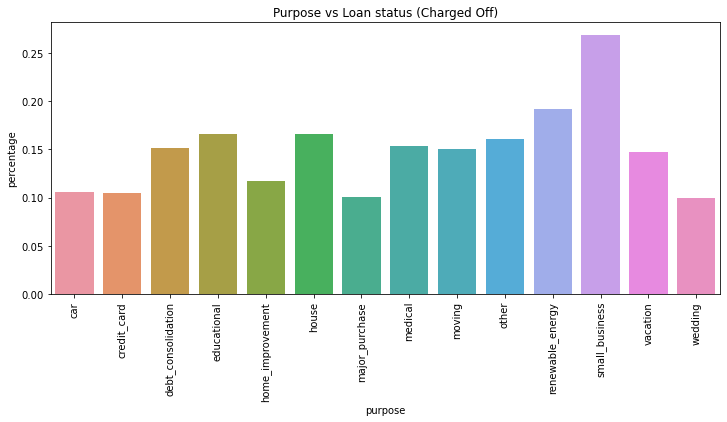

In [133]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['id'].count()
df['percentage'] = df.groupby('purpose').transform(lambda x: x/x.sum())
df = df[df.loan_status == 'Charged Off']
plt.figure(figsize=(12,5))
sns.barplot(x='purpose', y='percentage', data=df)
plt.xticks(rotation=90)
plt.title('Purpose vs Loan status (Charged Off)')

**Observations:**<br>
Charged-off are higher for small_business comparitively.

<Figure size 432x288 with 0 Axes>

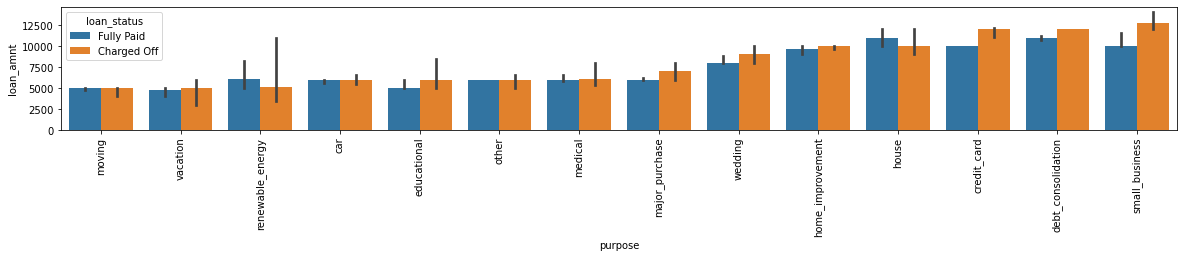

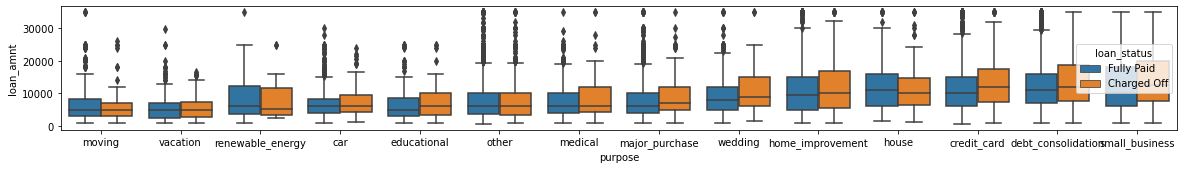

In [134]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['loan_amnt'].median()

plt.suptitle('Purpose vs loan amount')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='loan_amnt', hue='loan_status', data= data, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose, estimator=np.median)
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='loan_amnt', hue='loan_status', data= data, order=df[df.loan_status == 'Charged Off'].sort_values(by='loan_amnt').purpose)
plt.show()

**Observations:**<br>
Small Business has more defaults when the loan amount is also high.

<Figure size 432x288 with 0 Axes>

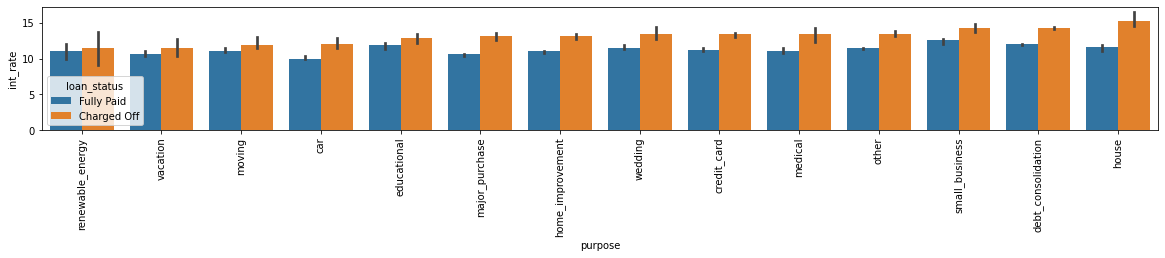

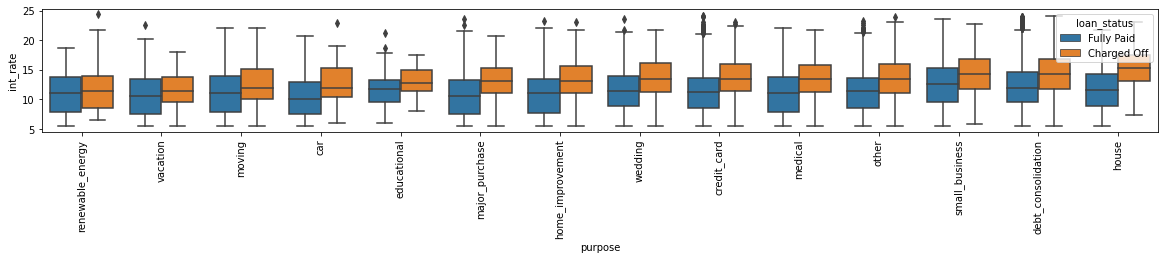

In [135]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['int_rate'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='int_rate').purpose

plt.suptitle('Purpose vs interest rate')
plt.figure(figsize=(20,5))
plt.subplot(211)
sns.barplot(x='purpose', y='int_rate', hue='loan_status', data= data, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=90)

plt.figure(figsize=(20,5))
plt.subplot(212)
sns.boxplot(x='purpose', y='int_rate', hue='loan_status', data= data, order = purpose_ord)
plt.xticks(rotation=90)
plt.show()

**Observations:**<br>
Home loans with high interest rates are mostly defaulted. Even small business and debt consolidation has similar observation.

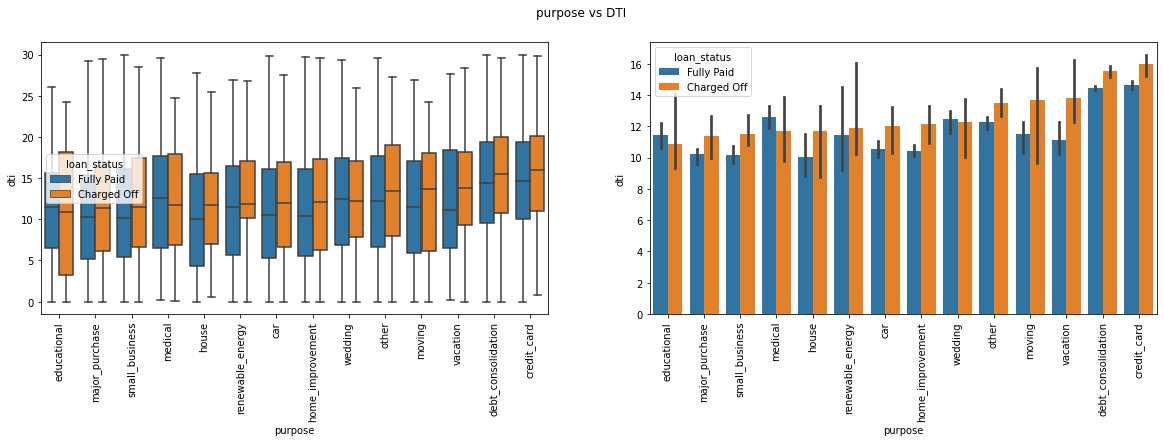

In [136]:
df = data.groupby(['purpose', 'loan_status'], as_index=False)['dti'].median()
purpose_ord = df[df.loan_status == 'Charged Off'].sort_values(by='dti').purpose

plt.figure(figsize=(20,5))
plt.suptitle('purpose vs DTI')
plt.subplot(121)
sns.boxplot(x='purpose', y='dti', hue='loan_status', data=data, order=purpose_ord)
plt.xticks(rotation=90)
plt.subplot(122)
sns.barplot(x='purpose', y='dti', hue='loan_status', data=data, estimator=np.median, order = purpose_ord)
plt.xticks(rotation=90)
plt.show()

**Observations:**<br>
Could not observe any pattern from the charts

## Loan Amount vs Interest Rate

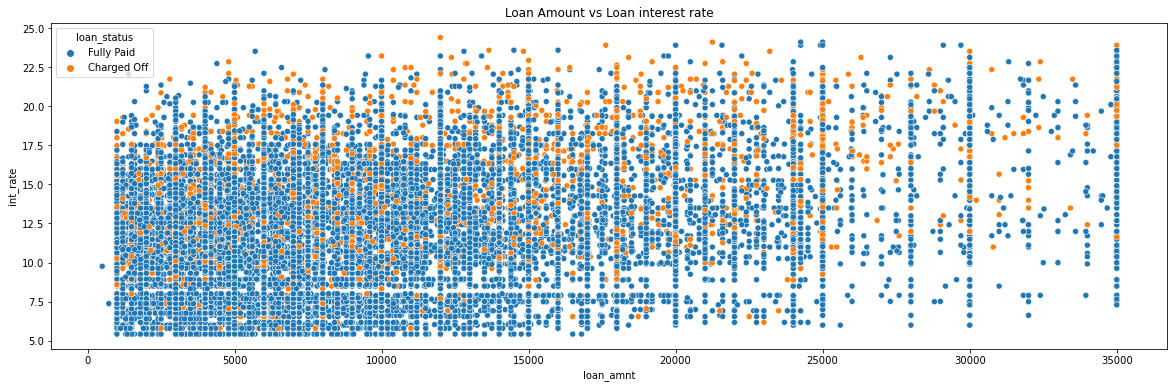

In [137]:
plt.figure(figsize=(20,6))
#scatter plot for analysing distribution
sns.scatterplot(x='loan_amnt', y='int_rate', data=data, hue='loan_status')
plt.title('Loan Amount vs Loan interest rate')
plt.show()

**Observartions:**<br> Values are pretty much spread accross all the space. There is not specific pattern found in the spread.

## Loan Amount vs Annual income

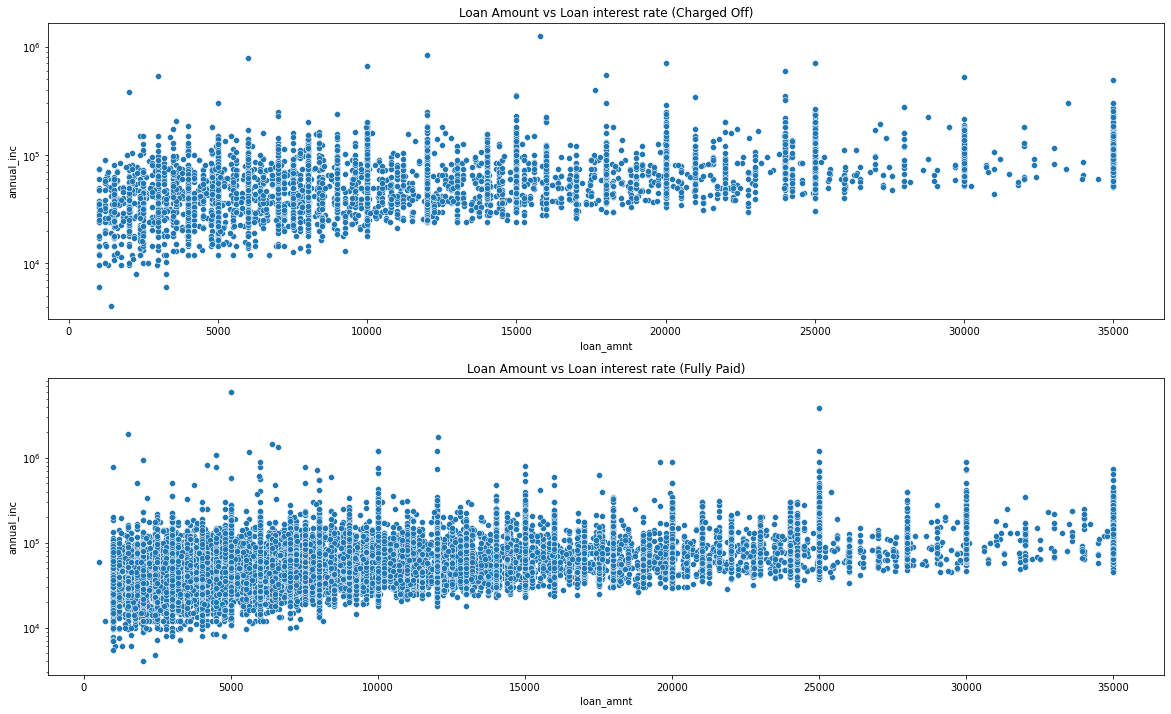

In [138]:
plt.figure(figsize=(20,12))
plt.subplot(211)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=data[data.loan_status == 'Charged Off'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Charged Off)')
plt.subplot(212)
sns.scatterplot(x='loan_amnt', y='annual_inc', data=data[data.loan_status == 'Fully Paid'])
plt.yscale('log')
plt.title('Loan Amount vs Loan interest rate (Fully Paid)')
plt.show()

**Observations:**<br>
Both Fully paid and Charged Off loans are having similar pattern versus Annual income. We can fit a linear patter with a line which has very much less slope.

## Loan Amount vs DTI

**Observartions:**<br> Values are pretty much spread accross all the space. There is not specific pattern found in the spread.

## Interest Rate vs DTI

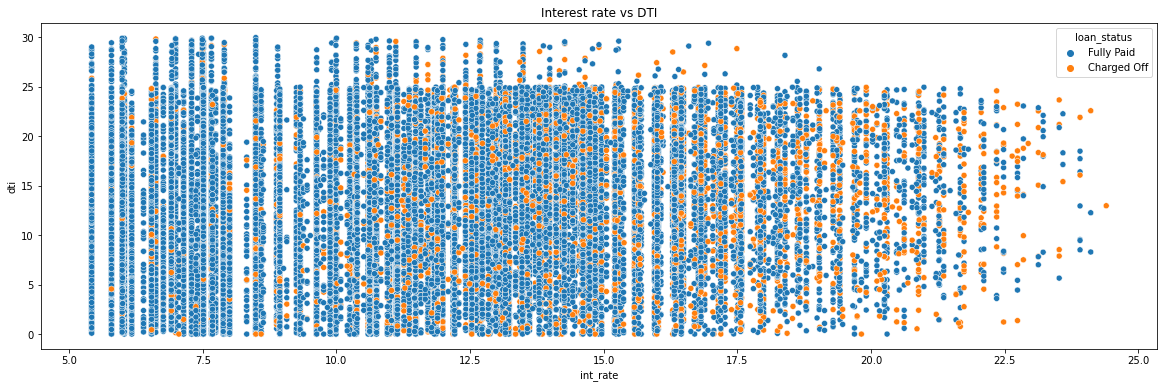

In [139]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='int_rate', y='dti', data=data, hue='loan_status')
plt.title('Interest rate vs DTI')
plt.show()

**Observations:**<br>
Values are spread all accross, but we can see one thing here irrespective of DTI when interest rates are high charged off loans are high.

## Correlation Matrix

Let's find the correlation between the variables/columns of out data set.

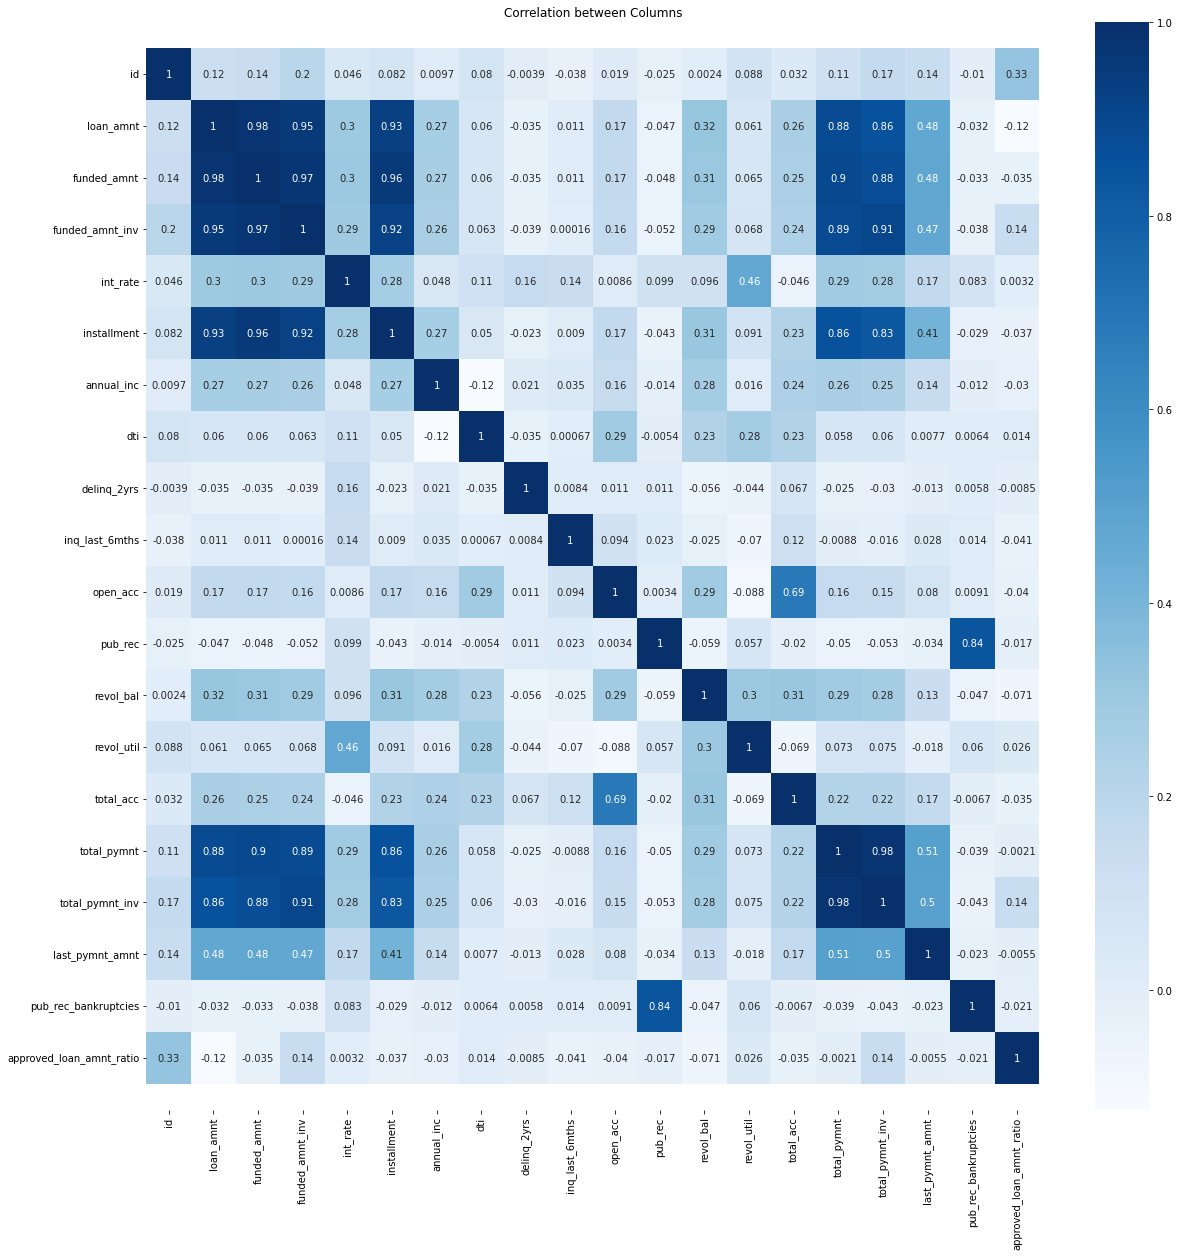

In [147]:
#Finding correlation matric
corr_matrix = data.corr()
plt.figure(figsize=(20,20))
#plotting correlatioon matric on a heat map
ax = sns.heatmap(corr_matrix, annot = True, cmap='Blues')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between Columns")
plt.show()

**Observations:**<br>

* The public derogatory records colummn is highly (+ve) correlated with public bankruptcies records.
* Interest rates are high for people with high revol utilisation.